In [186]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (18,10)
import re
import seaborn as sns

### Problem Statement - To cluster or group CTC that company provides based on features of its employees like orgyear, CTC, job_position & ctc_updated_year

In [187]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [188]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv')

In [189]:
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.0,5100000,NaN,2019.0


## EDA

In [190]:
df.columns

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

In [191]:
df = df.rename(columns={'Unnamed: 0': 'id'})

In [192]:
df.describe()

,id,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


In [193]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols

['id', 'orgyear', 'ctc', 'ctc_updated_year']

In [194]:
# Create histograms for numeric feature columns
df['orgyear'].value_counts()

2018.0    25256
2019.0    23427
2017.0    23239
2016.0    23043
2015.0    20610
          ...  
2107.0        1
1972.0        1
2101.0        1
208.0         1
200.0         1
Name: orgyear, Length: 77, dtype: int64

In [195]:
# Data cleaning
# we see max orgyear 20165 which is wrong year so need to replace it to max year
maxYear = df['orgyear'].max()
print(maxYear)
maxYearCTC = df['ctc_updated_year'].max()
print(maxYearCTC)

20165.0
2021.0


In [196]:
df.shape

(205843, 7)

In [197]:
# lets remove this filtered data as it pollutes Employment start date cannot be <1980 and >2023
df_range = df[(df['orgyear']>=1980) & (df['orgyear']<=2023)]
df_range

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.0,5100000,NaN,2019.0


In [198]:
df = df_range.copy()

In [199]:
# df.drop('Unnamed: 0', axis=1, inplace=True)

In [200]:
df.isna().sum()

id                      0
company_hash           44
email_hash              0
orgyear                 0
ctc                     0
job_position        52497
ctc_updated_year        0
dtype: int64

In [201]:
df[df['company_hash'].isna()]

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
1115,1115,NaN,8fe09b732fe2e5b66c14904fd02ff89fb54f458465ac1e5b04468e11db641e01,2022.0,66600000,NaN,2020.0
2400,2400,NaN,1074b55f02e6fc88596db85854e057c98cb53c038e0d7f3d5e353e0c1d1a977b,2018.0,250000,Other,2019.0
3277,3277,NaN,66263f4942b046c67ae6e2570e7825c03792631a0b13f1b5fed1fe3eafc396db,2018.0,500000,Other,2019.0
4205,4205,NaN,6eb55d779699a2ea94f340ab7a58c8ec505e38bbb41214278e72b5f03d2af064,2018.0,600000,NaN,2020.0
4596,4597,NaN,18813fe2a50a45cc02c5b3871c676bd147c80ff0327ee9e7bd8d9c121d9fa6d3,2020.0,300000,NaN,2021.0
11753,11761,NaN,ea4f735b9357e8086a42bacc1f64b18e98c3dd1ad81f60140c0f4e6be8616830,2018.0,300000,NaN,2021.0
14739,14748,NaN,b4a56d1199bc569aabd30cba8ea7a86fbddc85211453bac05e92b44a8e82e090,2013.0,1600000,NaN,2021.0
18853,18865,NaN,07a60d6e853852471b0963b78a0a3074532572a258086431b4a14a2a1e2aaecc,2017.0,700000,FullStack Engineer,2021.0
19466,19478,NaN,07a60d6e853852471b0963b78a0a3074532572a258086431b4a14a2a1e2aaecc,2017.0,700000,NaN,2021.0
22846,22864,NaN,bdce6736cc1d55a909a46aed9e0bfdcd7cd523bfcf9b63ffa17c618a9a6424e5,2010.0,2000000,NaN,2020.0


In [202]:
df.describe(include='object')

,company_hash,email_hash,job_position
count,205575,205619,153122
unique,37238,153253,1017
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b,Backend Engineer
freq,8335,10,43522


In [203]:
company_group = df[df['company_hash']=='qtrxvzwt xzegwgbb rxbxnta']
company_group

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.0,449999,FullStack Engineer,2019.0
697,697,qtrxvzwt xzegwgbb rxbxnta,8dcec4009f7a5bdd8c6a2af379b5763816563e25d814d018daa334db7843efff,2018.0,700000,Backend Engineer,2020.0
739,739,qtrxvzwt xzegwgbb rxbxnta,f4fa64972185ac2b73e99c0cc10d1bf50d6dbfbc9a2cbad8d14714cad5df925f,2018.0,620000,FullStack Engineer,2020.0
1389,1389,qtrxvzwt xzegwgbb rxbxnta,97f1a965db57f2baacbbacf36b9572819e8a90007e3c86d090ddc96ab8fc7fd7,2020.0,1100000,NaN,2021.0
3118,3118,qtrxvzwt xzegwgbb rxbxnta,fe8010b8aa29f7bd16d111ab332881cdfc819fbcc82b5d9b690ffe16310c2d44,2019.0,630000,Backend Engineer,2021.0
...,...,...,...,...,...,...,...
198705,199734,qtrxvzwt xzegwgbb rxbxnta,b67301f0a89fd75a87fb41e5eb7627735b7f75a06741e63faf62ce5c4fb358a3,2014.0,1300000,Backend Engineer,2019.0
200421,201469,qtrxvzwt xzegwgbb rxbxnta,a9aa04db60d145b683c55499d8cdcfd5f1435a61e98d34659248bc8cbf491e08,2018.0,457000,Data Analyst,2021.0
201488,202539,qtrxvzwt xzegwgbb rxbxnta,926f89662afe3e36f2577c8b5e313d47f433d363c1ca001caf10ee06b954145a,2005.0,1750000,iOS Engineer,2019.0
202366,203432,qtrxvzwt xzegwgbb rxbxnta,0d9a272375d925015b9553d363a7d7c9984ce29fe755e4f73407ddf19983ac86,2018.0,450000,Backend Engineer,2020.0


In [204]:
# Checking unique emails and frequency of occurrence of the same email hash in the data.
# Recording observation and inference, wherever necessary.
email_counts = df['email_hash'].value_counts()
email_counts

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
                                                                    ..
1bf133f4545f330347ce99d4ef23e10d08c72a6d2a71d1fff92426adebbafe7a     1
352332d97ee4a09346cd4b539c096843c97f6e88352adeaeb132e52c7fe15143     1
ce7b0b9c2d37b0df8fc9f9436961ece9086226b6450ace168bb475017bdd87c6     1
6ed7767a6ba36e8ab4f4d2397a4d32f26f34387720645906bf51a05c2152fd56     1
0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31     1
Name: email_hash, Length: 153253, dtype: int64

In [205]:
email_group = df[df['email_hash']=='b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66']
email_group

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
37734,37778,bvi ogenfvqt,b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,2020.0,900000,Engineering Leadership,2021.0
45982,46036,bvi ogenfvqt,b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,2020.0,900000,Engineering Intern,2021.0
144760,145307,bvi ogenfvqt,b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,2020.0,900000,Data Analyst,2021.0
151714,152309,bvi ogenfvqt,b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,2020.0,900000,Data Scientist,2021.0
153866,154474,bvi ogenfvqt,b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,2020.0,900000,NaN,2021.0
154644,155256,bvi ogenfvqt,b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,2020.0,900000,Software Engineer 1,2021.0
197145,198160,bvi ogenfvqt,b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,2020.0,2000000,Engineering Intern,2021.0
203171,204242,bvi ogenfvqt,b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,2020.0,2000000,Data Analyst,2021.0


We notice that for every email hash repetition only 1 unique company_hash exists.  

In [206]:
# remove special characters from the dataset by using Regex for cleaning company names
df['company_hash'] = df['company_hash'].str.replace('[^A-Za-z0-9 ]+', '', regex=True)
df

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.0,5100000,NaN,2019.0


Handling null values in dataset

In [207]:
# replace NA in company_hash to first value of email_hash (just for uniqueness, we will do label encoding later)
grouped = df.groupby('company_hash')

# Define a function to fill NA values with the first 'email_hash' value in the group
def fill_na_with_first(group):
    first_email_hash = group['email_hash'].dropna().iloc[0]  # Get the first non-NA value
    group['company_hash'].fillna(first_email_hash, inplace=True)
    return group

# Apply the function to each group within the DataFrame
df_filled = grouped.apply(fill_na_with_first).reset_index(drop=True)
df_filled

<ipython-input-207-599f3a77d0e6>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_filled = grouped.apply(fill_na_with_first).reset_index(drop=True)


,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205570,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.0,220000,NaN,2019.0
205571,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.0,500000,NaN,2020.0
205572,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.0,700000,NaN,2021.0
205573,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.0,5100000,NaN,2019.0


In [208]:
df_filled.isna().sum()

id                      0
company_hash            0
email_hash              0
orgyear                 0
ctc                     0
job_position        52466
ctc_updated_year        0
dtype: int64

In [209]:
# replace NA in orgyear to ctc_updated_year
df_filled['orgyear'].fillna(df_filled['ctc_updated_year'], inplace=True)
df_filled

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205570,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.0,220000,NaN,2019.0
205571,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.0,500000,NaN,2020.0
205572,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.0,700000,NaN,2021.0
205573,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.0,5100000,NaN,2019.0


In [210]:
df_filled.isna().sum()

id                      0
company_hash            0
email_hash              0
orgyear                 0
ctc                     0
job_position        52466
ctc_updated_year        0
dtype: int64

In [211]:
df[df['job_position'].isna()]

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
8,8,utqoxontzn ojontbo,e245da546bf50eba09cb7c9976926bd56557d1ac9a17fb019e8de1fdb83fc0d6,2020.0,450000,NaN,2019.0
9,9,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5e804e1dc27e305b06b,2019.0,360000,NaN,2019.0
12,12,mvqwrvjo wgqugqvnt mvzpxzs,7f24d2f5171ea469482a9966832237bc023678883ecd0c5142677b75a138b2fa,2020.0,800000,NaN,2020.0
17,17,puxn,26b502eb6439ac80bd618a6f7c2b1c640b84c1e64c472cf0510b0b36c2d3c247,2020.0,1400000,NaN,2019.0
18,18,mvlvl exzotqc,62d2e04b44c8bf2f6ec15d5b4c259c06199f598dc51816b1e32a84bc3ed980ea,2018.0,100000,NaN,2021.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.0,5100000,NaN,2019.0


In [212]:
# replace NA in job_position to Unknown
df_filled['job_position'].fillna("Unknown", inplace=True)
df_filled

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205570,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.0,220000,Unknown,2019.0
205571,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.0,500000,Unknown,2020.0
205572,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.0,700000,Unknown,2021.0
205573,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.0,5100000,Unknown,2019.0


In [213]:
df_filled.isna().sum()

id                  0
company_hash        0
email_hash          0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

All missing values are handled in df_filled

In [214]:
df_filled.shape

(205575, 7)

In [215]:
df = df_filled.copy()

In [216]:
# Check for duplicates and drop them
df = df.drop_duplicates()

In [217]:
df.shape

(205575, 7)

Making some new features like adding ‘Years of Experience’ column by subtracting orgyear from current year

In [218]:
df['YOE'] = 2023 - df['orgyear']
df

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.0,1100000,Other,2020.0,7.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.0,449999,FullStack Engineer,2019.0,5.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.0,2000000,Backend Engineer,2020.0,8.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.0,700000,Backend Engineer,2019.0,6.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.0,1400000,FullStack Engineer,2019.0,6.0
...,...,...,...,...,...,...,...,...
205570,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.0,220000,Unknown,2019.0,15.0
205571,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.0,500000,Unknown,2020.0,6.0
205572,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.0,700000,Unknown,2021.0,2.0
205573,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.0,5100000,Unknown,2019.0,4.0


### Univariate Analysis

<Axes: >

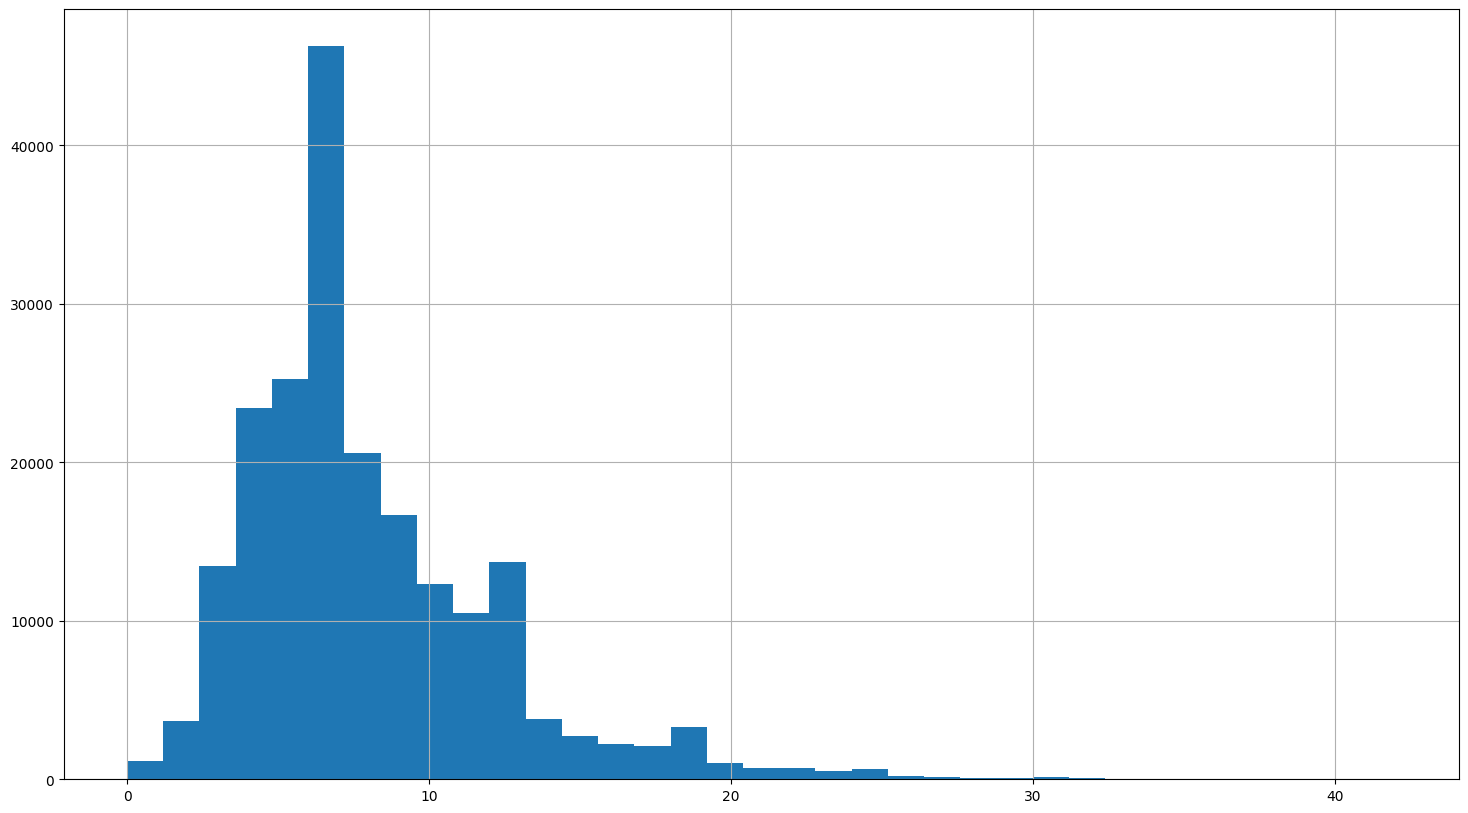

In [219]:
df['YOE'].hist(bins=35)

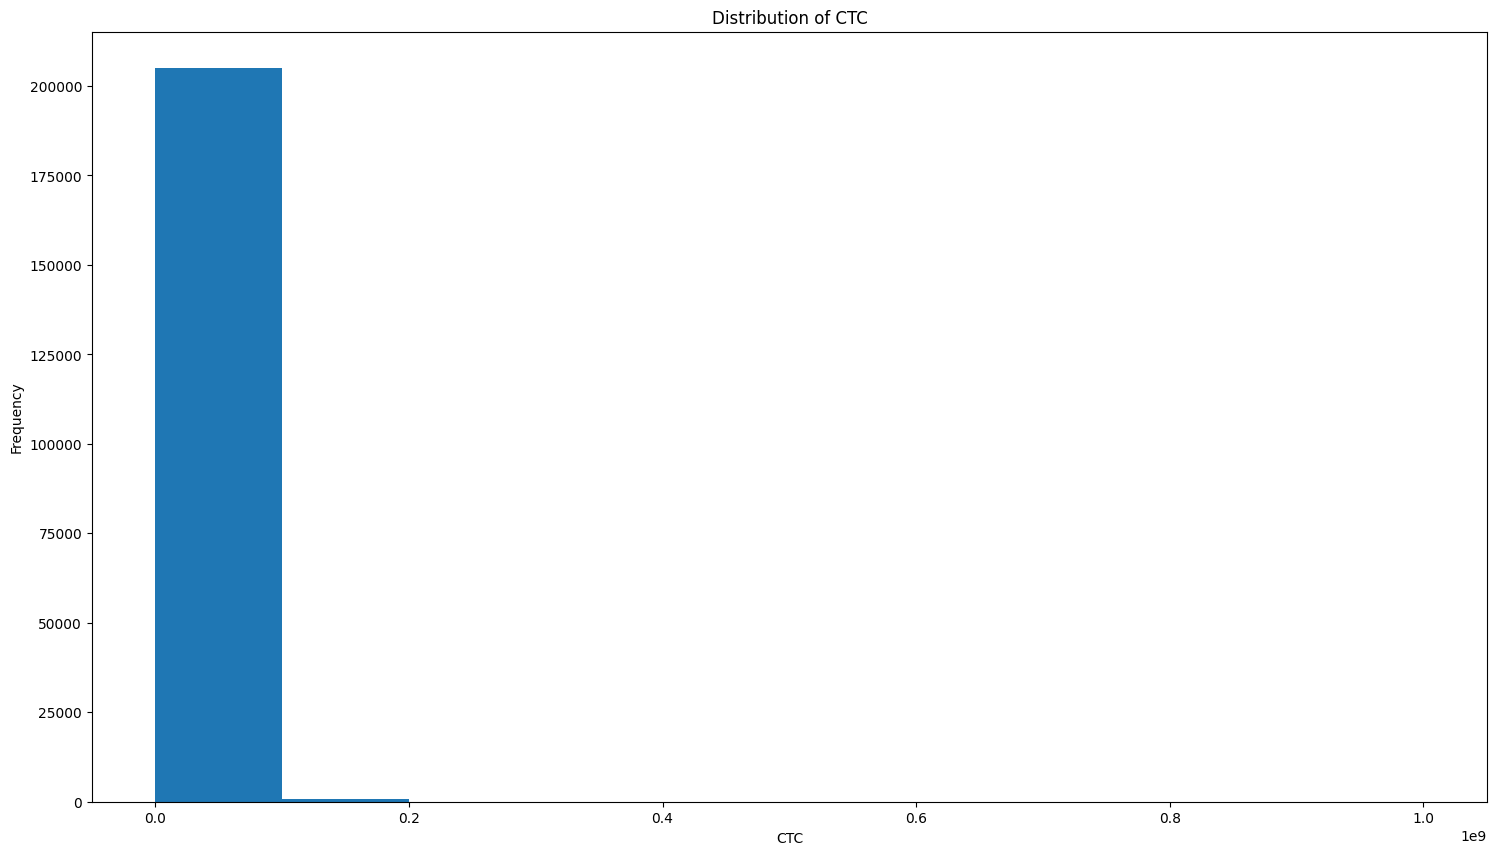

In [220]:
import matplotlib.pyplot as plt
df['ctc'].plot.hist()
plt.title('Distribution of CTC')
plt.xlabel('CTC')
plt.ylabel('Frequency')
plt.show()

YOE    Axes(0.125,0.11;0.775x0.77)
dtype: object

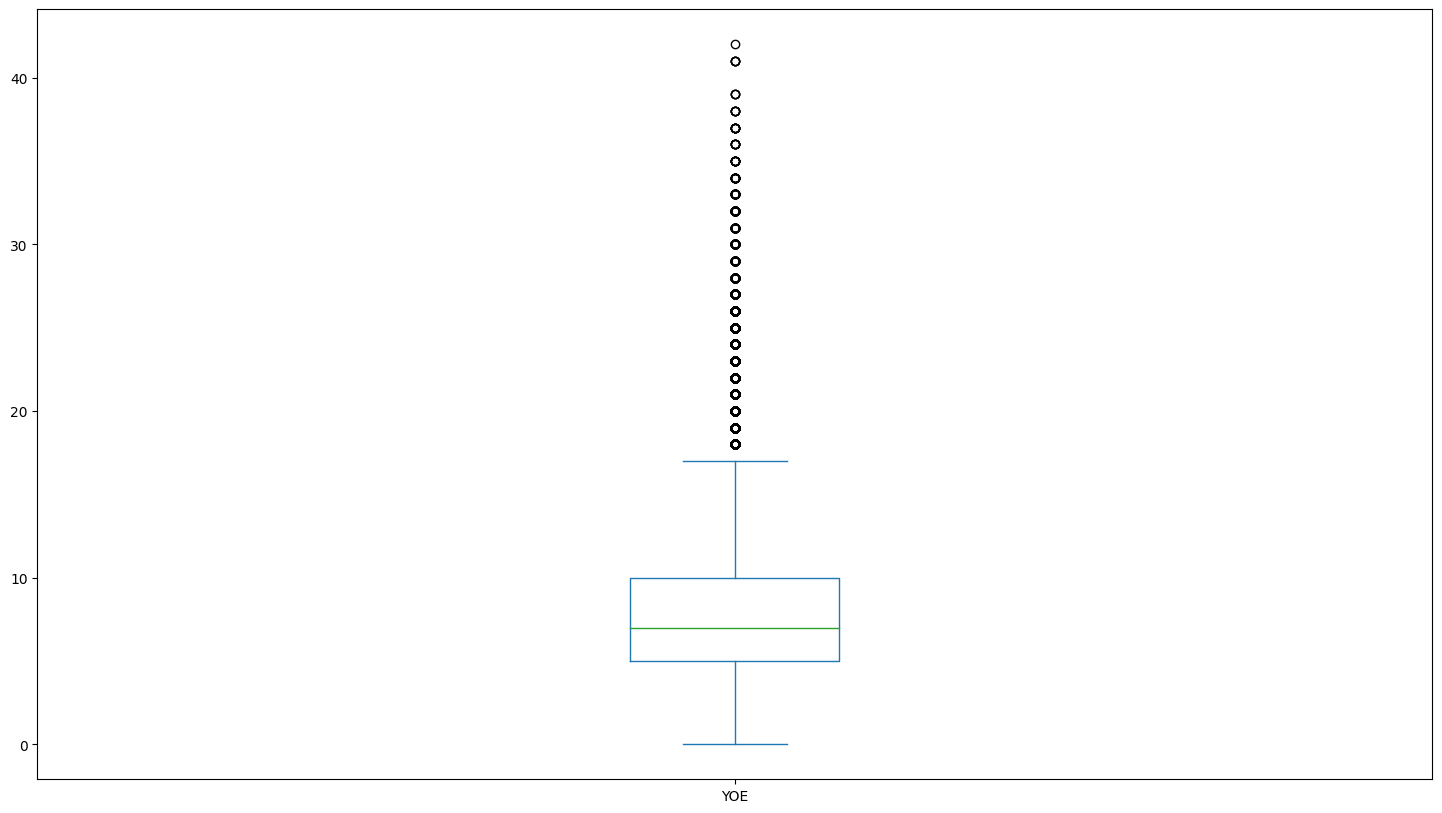

In [221]:
df[['YOE']].plot(kind='box', subplots=True)


Bivariate Analysis

<Axes: >

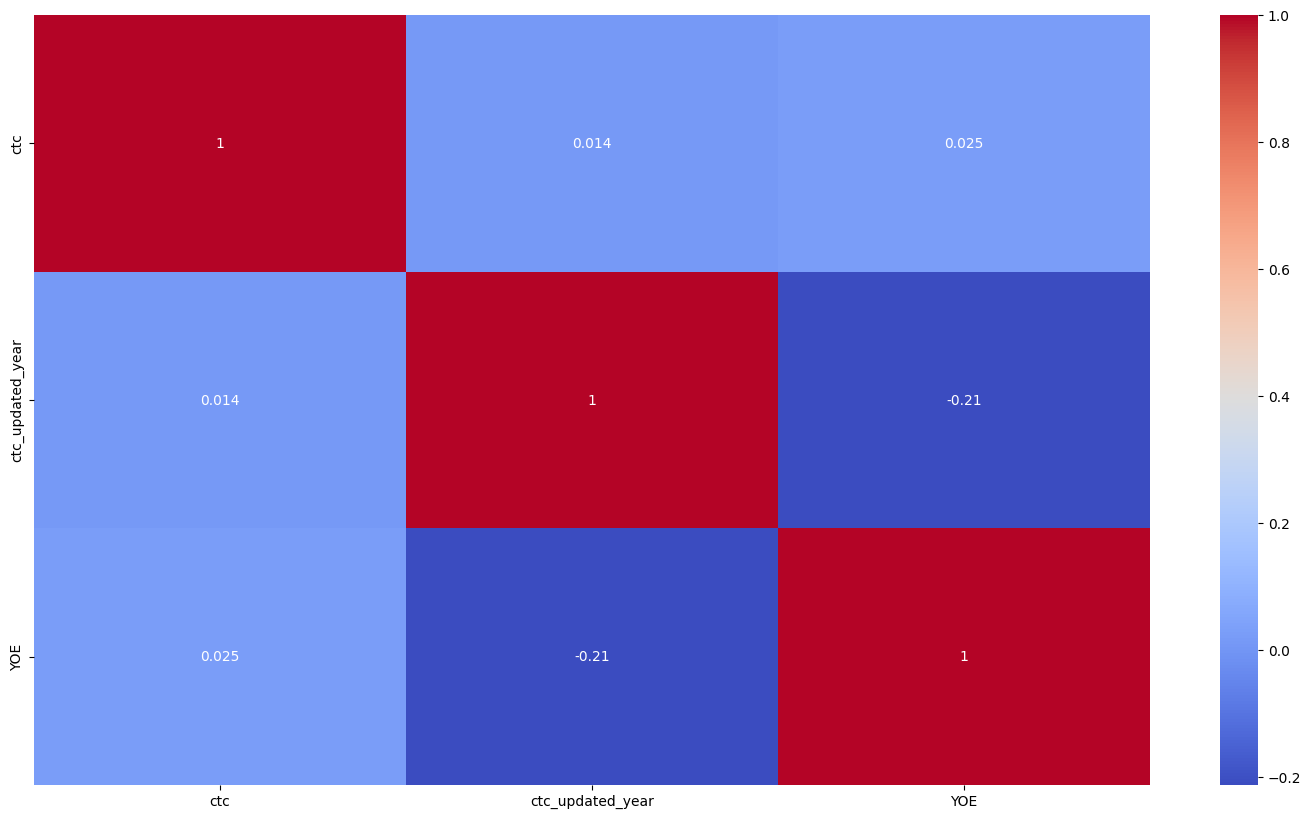

In [222]:
import seaborn as sns
correlation_matrix = df[['ctc', 'ctc_updated_year', 'YOE']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

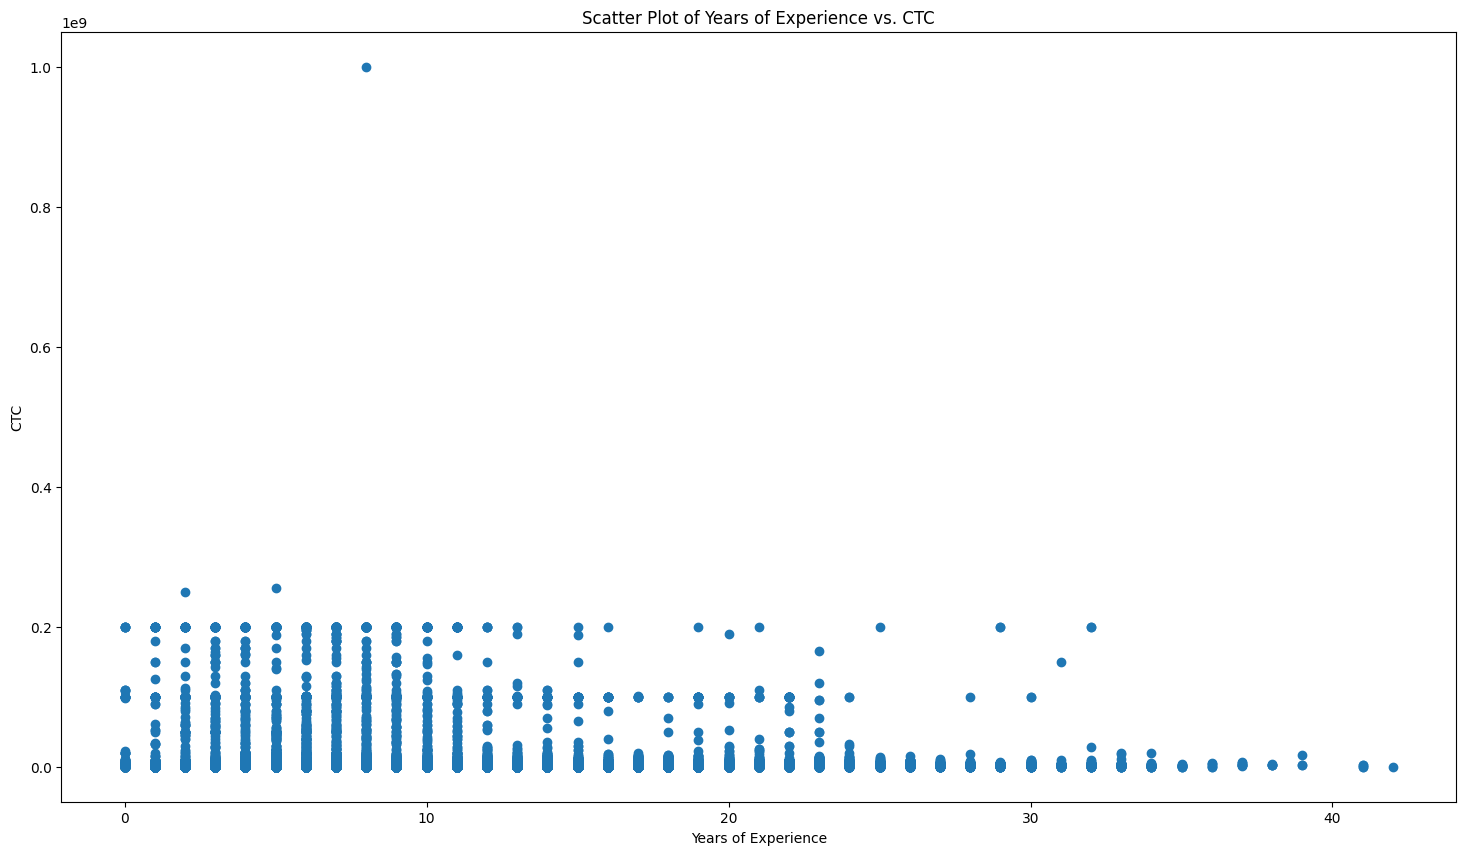

In [223]:
plt.scatter(df['YOE'], df['ctc'])
plt.title('Scatter Plot of Years of Experience vs. CTC')
plt.xlabel('Years of Experience')
plt.ylabel('CTC')
plt.show()

In [224]:
# remove 1 outlier and see plot again
df = df[df['ctc']<0.8*1e9]
df

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.0,1100000,Other,2020.0,7.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.0,449999,FullStack Engineer,2019.0,5.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.0,2000000,Backend Engineer,2020.0,8.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.0,700000,Backend Engineer,2019.0,6.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.0,1400000,FullStack Engineer,2019.0,6.0
...,...,...,...,...,...,...,...,...
205570,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.0,220000,Unknown,2019.0,15.0
205571,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.0,500000,Unknown,2020.0,6.0
205572,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.0,700000,Unknown,2021.0,2.0
205573,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.0,5100000,Unknown,2019.0,4.0


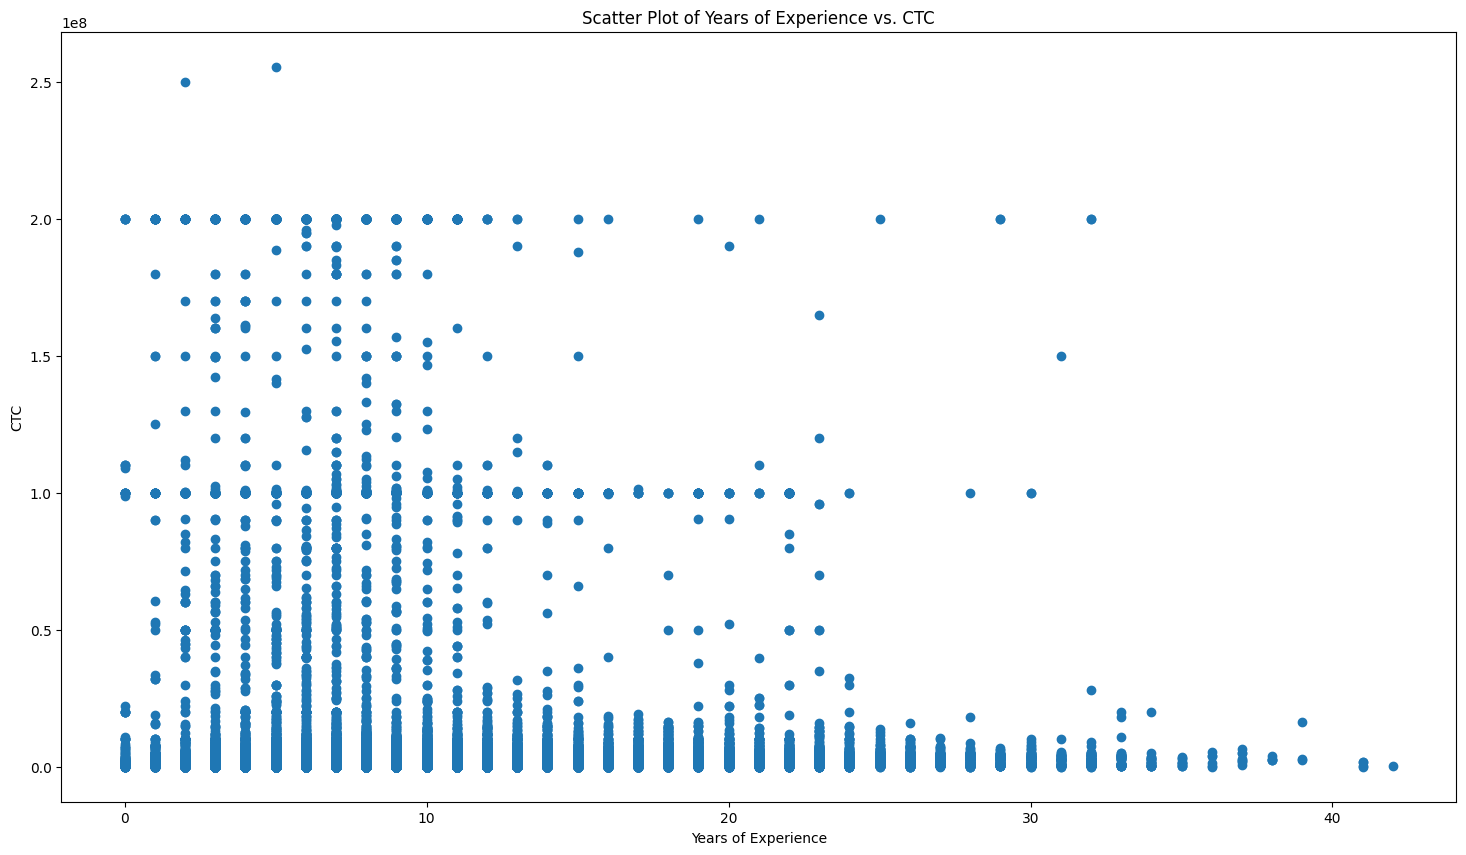

In [225]:
plt.scatter(df['YOE'], df['ctc'])
plt.title('Scatter Plot of Years of Experience vs. CTC')
plt.xlabel('Years of Experience')
plt.ylabel('CTC')
plt.show()

In [226]:
# remove ctc more than 15 Lakhs and see plot again
dfless15lac_ctc = df[df['ctc']<0.15*1e8]
dfless15lac_ctc

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.0,1100000,Other,2020.0,7.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.0,449999,FullStack Engineer,2019.0,5.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.0,2000000,Backend Engineer,2020.0,8.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.0,700000,Backend Engineer,2019.0,6.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.0,1400000,FullStack Engineer,2019.0,6.0
...,...,...,...,...,...,...,...,...
205570,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.0,220000,Unknown,2019.0,15.0
205571,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.0,500000,Unknown,2020.0,6.0
205572,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.0,700000,Unknown,2021.0,2.0
205573,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.0,5100000,Unknown,2019.0,4.0


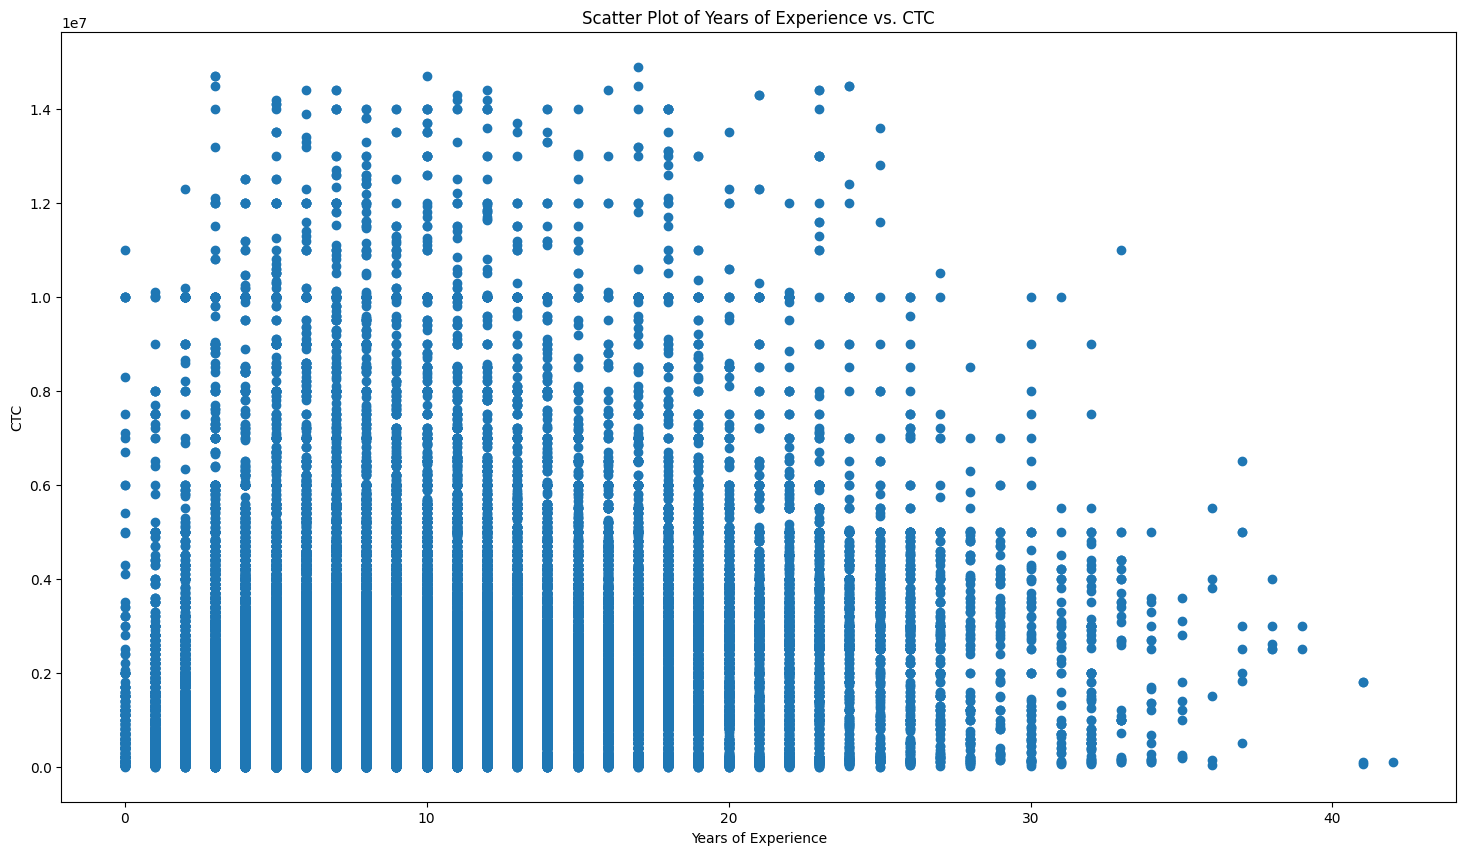

In [227]:
plt.scatter(dfless15lac_ctc['YOE'], dfless15lac_ctc['ctc'])
plt.title('Scatter Plot of Years of Experience vs. CTC')
plt.xlabel('Years of Experience')
plt.ylabel('CTC')
plt.show()

<Axes: xlabel='orgyear'>

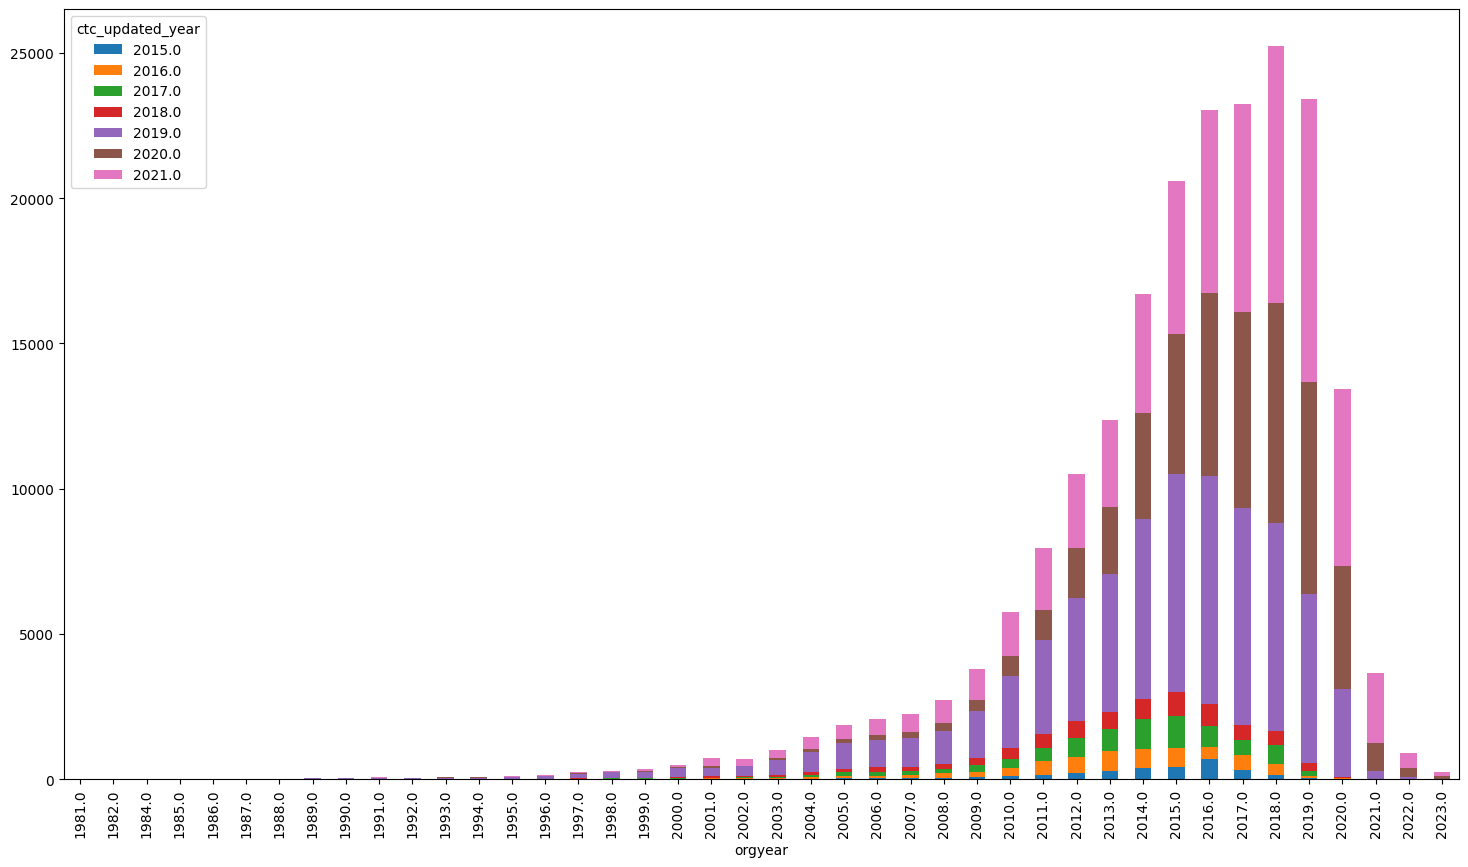

In [228]:
crosstab = pd.crosstab(df['orgyear'], df['ctc_updated_year'])
crosstab.plot(kind='bar', stacked=True)

## Insights based on EDA:
1. The org year & ctc updated year were having few outliers that doesnot make sense like max year 20165 & min year so removed those values.
2. We handled null values in dataset, there were lot of null values in company_id & on analysis we saw for every email_id there exists unique company_id, so we can replace company_id to first email_id of that company.
3. Mostly dataset contains data with people having 3-12 years of experience.
4. Mostly people got increment (ctc updated) in years 2019 to 2021. Although, people have been working from 2009-2021 (orgyear).
5. With YOE 8-12 years, CTC has big range with 8 years work experience having most of it. According to data, it doesnot matter on YOE for CTC, CTC ranges depend on other things also. Data for 8-12 YOE is also more.
6. There is negative correlation between CTC updated year & YOE.


## Manual Clustering
```
Manual Clustering on the basis of learner’s company, job position and years of experience
Getting the 5 point summary of CTC (mean, median, max, min, count etc) on the basis of Company, Job Position, Years of Experience
Merging the same with original dataset carefully and creating some flags showing learners with CTC greater than the Average of their Company’s department having same Years of Experience - Call that flag designation with values [1,2,3]
Doing above analysis at Company & Job Position level. Name that flag Class with values [1,2,3]
Repeating the same analysis at the Company level. Name that flag Tier with values [1,2,3]
```



In [229]:
df

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.0,1100000,Other,2020.0,7.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.0,449999,FullStack Engineer,2019.0,5.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.0,2000000,Backend Engineer,2020.0,8.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.0,700000,Backend Engineer,2019.0,6.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.0,1400000,FullStack Engineer,2019.0,6.0
...,...,...,...,...,...,...,...,...
205570,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.0,220000,Unknown,2019.0,15.0
205571,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.0,500000,Unknown,2020.0,6.0
205572,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.0,700000,Unknown,2021.0,2.0
205573,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.0,5100000,Unknown,2019.0,4.0


In [230]:
agg_data = df.groupby(['company_hash', 'job_position','YOE']).agg({
    'ctc':['mean','median','max','min']
})
agg_data

ctc            \
                                                          mean    median   
company_hash                 job_position       YOE                        
0                            Other              3.0   100000.0  100000.0   
                             Unknown            3.0   100000.0  100000.0   
0000                         Other              6.0   300000.0  300000.0   
01 ojztqsj                   Android Engineer   7.0   270000.0  270000.0   
                             Frontend Engineer  12.0  830000.0  830000.0   
...                                                        ...       ...   
zz                           Unknown            14.0  500000.0  500000.0   
zzb ztdnstz vacxogqj ucn rna FullStack Engineer 6.0   600000.0  600000.0   
                             Unknown            6.0   600000.0  600000.0   
zzgato                       Unknown            9.0   130000.0  130000.0   
zzzbzb                       Other              33.0  720000.0  720000.0   

                                                                      
                                                         max     min  
company_hash                 job_position       YOE                   
0                            Other              3.0   100000  100000  
                             Unknown            3.0   100000  100000  
0000                         Other              6.0   300000  300000  
01 ojztqsj                   Android Engineer   7.0   270000  270000  
                             Frontend Engineer  12.0  830000  830000  
...                                                      ...     ...  
zz                           Unknown            14.0  500000  500000  
zzb ztdnstz vacxogqj ucn rna FullStack Engineer 6.0   600000  600000  
                             Unknown            6.0   600000  600000  
zzgato                       Unknown            9.0   130000  130000  
zzzbzb                       Other              33.0  720000  720000  

[113294 rows x 4 columns]

In [231]:
agg_data = agg_data.reset_index()
agg_data

company_hash        job_position   YOE       ctc  \
                                                                    mean   
0                                  0               Other   3.0  100000.0   
1                                  0             Unknown   3.0  100000.0   
2                               0000               Other   6.0  300000.0   
3                         01 ojztqsj    Android Engineer   7.0  270000.0   
4                         01 ojztqsj   Frontend Engineer  12.0  830000.0   
...                              ...                 ...   ...       ...   
113289                            zz             Unknown  14.0  500000.0   
113290  zzb ztdnstz vacxogqj ucn rna  FullStack Engineer   6.0  600000.0   
113291  zzb ztdnstz vacxogqj ucn rna             Unknown   6.0  600000.0   
113292                        zzgato             Unknown   9.0  130000.0   
113293                        zzzbzb               Other  33.0  720000.0   

                                  
          median     max     min  
0       100000.0  100000  100000  
1       100000.0  100000  100000  
2       300000.0  300000  300000  
3       270000.0  270000  270000  
4       830000.0  830000  830000  
...          ...     ...     ...  
113289  500000.0  500000  500000  
113290  600000.0  600000  600000  
113291  600000.0  600000  600000  
113292  130000.0  130000  130000  
113293  720000.0  720000  720000  

[113294 rows x 7 columns]

In [232]:
agg_data.columns = [' '.join(col).strip() for col in agg_data.columns.values]
agg_data

,company_hash,job_position,YOE,ctc mean,ctc median,ctc max,ctc min
0,0,Other,3.0,100000.0,100000.0,100000,100000
1,0,Unknown,3.0,100000.0,100000.0,100000,100000
2,0000,Other,6.0,300000.0,300000.0,300000,300000
3,01 ojztqsj,Android Engineer,7.0,270000.0,270000.0,270000,270000
4,01 ojztqsj,Frontend Engineer,12.0,830000.0,830000.0,830000,830000
...,...,...,...,...,...,...,...
113289,zz,Unknown,14.0,500000.0,500000.0,500000,500000
113290,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer,6.0,600000.0,600000.0,600000,600000
113291,zzb ztdnstz vacxogqj ucn rna,Unknown,6.0,600000.0,600000.0,600000,600000
113292,zzgato,Unknown,9.0,130000.0,130000.0,130000,130000


In [233]:
# data with varying mean median max min
agg_data[agg_data['ctc mean']!=agg_data['ctc median']]

,company_hash,job_position,YOE,ctc mean,ctc median,ctc max,ctc min
50,1bs,Backend Engineer,4.0,1.116667e+06,1000000.0,1350000,1000000
51,1bs,Backend Engineer,5.0,9.333333e+05,900000.0,1100000,800000
52,1bs,Backend Engineer,6.0,1.218333e+06,1250000.0,1610000,800000
54,1bs,Backend Engineer,8.0,2.243333e+06,2000000.0,2930000,1800000
75,1bs,Unknown,4.0,1.030000e+06,1000000.0,1350000,600000
...,...,...,...,...,...,...,...
113260,zxztrtvuo,Frontend Engineer,4.0,5.100000e+05,500000.0,550000,450000
113262,zxztrtvuo,Frontend Engineer,7.0,8.324998e+05,849999.5,930000,700000
113269,zxztrtvuo,FullStack Engineer,7.0,8.993333e+05,923000.0,1200000,575000
113274,zxztrtvuo,Unknown,3.0,5.888889e+05,450000.0,900000,400000


In [234]:
# merge these values with df
df_merged = df.merge(agg_data, on=['company_hash', 'job_position', 'YOE'], how='left')
df_merged

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,ctc mean,ctc median,ctc max,ctc min
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.0,1100000,Other,2020.0,7.0,1.100000e+06,1100000.0,1100000,1100000
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.0,449999,FullStack Engineer,2019.0,5.0,7.742856e+05,750000.0,1200000,449999
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.0,2000000,Backend Engineer,2020.0,8.0,2.000000e+06,2000000.0,2000000,2000000
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.0,700000,Backend Engineer,2019.0,6.0,1.158571e+06,1200000.0,1750000,700000
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.0,1400000,FullStack Engineer,2019.0,6.0,1.400000e+06,1400000.0,1400000,1400000
...,...,...,...,...,...,...,...,...,...,...,...,...
205569,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.0,220000,Unknown,2019.0,15.0,2.200000e+05,220000.0,220000,220000
205570,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.0,500000,Unknown,2020.0,6.0,1.150000e+06,1450000.0,1500000,500000
205571,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.0,700000,Unknown,2021.0,2.0,6.666667e+05,700000.0,1000000,300000
205572,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.0,5100000,Unknown,2019.0,4.0,5.920732e+06,710000.0,180000000,7300


In [235]:
df_comparison=df_merged.copy()

In [278]:
# Define a function to categorize the 'ctc' values
def categorize_ctc(row, comparison_column):
    if row['ctc'] < 0.5 * row[comparison_column]:
        return 3  # Less than 50% of mean_ctc -> Underpaid
    elif row['ctc'] > 1.5 * row[comparison_column]:
        return 1  # More than 150% of mean_ctc -> Cream employees
    else:
        return 2  # Within the range

Flag Designation calculation

In [279]:
df_comparison['ctc_flag_mean'] = df_comparison.apply(categorize_ctc, args=('ctc mean',), axis=1)
df_comparison['ctc_flag_median'] = df_comparison.apply(categorize_ctc, args=('ctc median',), axis=1)
df_comparison

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,ctc mean,ctc median,ctc max,ctc min,ctc_flag_mean,ctc_flag_median
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.0,1100000,Other,2020.0,7.0,1.100000e+06,1100000.0,1100000,1100000,2,2
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.0,449999,FullStack Engineer,2019.0,5.0,7.742856e+05,750000.0,1200000,449999,2,2
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.0,2000000,Backend Engineer,2020.0,8.0,2.000000e+06,2000000.0,2000000,2000000,2,2
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.0,700000,Backend Engineer,2019.0,6.0,1.158571e+06,1200000.0,1750000,700000,2,2
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.0,1400000,FullStack Engineer,2019.0,6.0,1.400000e+06,1400000.0,1400000,1400000,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205569,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.0,220000,Unknown,2019.0,15.0,2.200000e+05,220000.0,220000,220000,2,2
205570,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.0,500000,Unknown,2020.0,6.0,1.150000e+06,1450000.0,1500000,500000,3,3
205571,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.0,700000,Unknown,2021.0,2.0,6.666667e+05,700000.0,1000000,300000,2,2
205572,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.0,5100000,Unknown,2019.0,4.0,5.920732e+06,710000.0,180000000,7300,2,1


In [280]:
df_comparison[df_comparison['ctc_flag_mean']!=df_comparison['ctc_flag_median']]
# maybe many outliers

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,ctc mean,ctc median,ctc max,ctc min,ctc_flag_mean,ctc_flag_median
81,81,nv axsxnvr,d1829ec6261f538309e4496ff0c97a87ecd782067343d5a323f818ea0d7d46a1,2020.0,910000,Unknown,2019.0,3.0,6.214284e+05,590000.0,970000,380000,2,1
83,83,wgszxkvzn,985f3ffced0e16713147c7c36ec70c5414cc9d6c79fe9d940fa55672c4e3da07,2015.0,750000,Other,2019.0,8.0,4.405189e+06,600000.0,200000000,105000,3,2
116,116,mvqwrvjo wgqugqvnt mvzpxzs,3e2e7e6242f662ccd27dbd41ace1a029d19b9dedd7e4f7b49b507ddb1bdb01db,2019.0,800000,Engineering Intern,2019.0,4.0,3.380000e+06,1100000.0,12000000,800000,3,2
185,185,ntwy bvyxzaqv,2ee09b45e4335aa9aeb6ac2b36ddd79dcbe5f7b954d2587f2a722800dd9d5ded,2017.0,250000,Support Engineer,2020.0,6.0,1.150556e+07,400000.0,100250000,250000,3,2
201,201,fxuqg rxbxnta,e4ad74a458078a292a1de28d2039c36b415e7e12682e94e98c3555be1858d865,2016.0,720000,Unknown,2020.0,7.0,3.671746e+06,620000.0,190000000,100000,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205556,206905,vbvkgz,95023bca0172ad67bfc3453550c5cf056557bc2c8c7169c45d544526834d19a4,2016.0,4800000,Unknown,2020.0,7.0,3.910271e+06,1105000.0,200000000,28000,2,1
205561,206910,zgn vuurxwvmrt,586e06d65892218f96debd87457bc127de3cae87dd0edf32f1ec3b50bc2c1321,2019.0,700000,Unknown,2019.0,4.0,5.920732e+06,710000.0,180000000,7300,3,2
205564,206913,vbvkgz,f4415be48a1ef885e086dcd72181f667a289641e66f828159d7154228a9b9a95,2014.0,3800000,Unknown,2019.0,9.0,2.633232e+06,1890000.0,56700000,14000,2,1
205568,206917,zgn vuurxwvmrt,fe34477c3f64e6ed4301417c8fb9d5e2608722a10f1f4e5cf7872038bbb98b31,2021.0,800000,Unknown,2021.0,2.0,5.365137e+06,1000000.0,100000000,10000,3,2


In [281]:
agg_data_company_job = df.groupby(['company_hash', 'job_position']).agg({
    'ctc':['mean','median','max','min']
})
agg_data_company_job = agg_data_company_job.reset_index()
agg_data_company_job.columns = [' '.join(col).strip() for col in agg_data_company_job.columns.values]
agg_data_company_job

,company_hash,job_position,ctc mean,ctc median,ctc max,ctc min
0,0,Other,100000.0,100000.0,100000,100000
1,0,Unknown,100000.0,100000.0,100000,100000
2,0000,Other,300000.0,300000.0,300000,300000
3,01 ojztqsj,Android Engineer,270000.0,270000.0,270000,270000
4,01 ojztqsj,Frontend Engineer,830000.0,830000.0,830000,830000
...,...,...,...,...,...,...
71201,zz,Unknown,500000.0,500000.0,500000,500000
71202,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer,600000.0,600000.0,600000,600000
71203,zzb ztdnstz vacxogqj ucn rna,Unknown,600000.0,600000.0,600000,600000
71204,zzgato,Unknown,130000.0,130000.0,130000,130000


In [282]:
# merge these values with df_comparison
df_comparison2 = df_comparison.merge(agg_data_company_job, on=['company_hash','job_position'], how='left')
df_comparison2

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,ctc mean_x,ctc median_x,ctc max_x,ctc min_x,ctc_flag_mean,ctc_flag_median,ctc mean_y,ctc median_y,ctc max_y,ctc min_y
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.0,1100000,Other,2020.0,7.0,1.100000e+06,1100000.0,1100000,1100000,2,2,1.085000e+06,1085000.0,1100000,1070000
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.0,449999,FullStack Engineer,2019.0,5.0,7.742856e+05,750000.0,1200000,449999,2,2,9.511363e+05,800000.0,2000000,300000
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.0,2000000,Backend Engineer,2020.0,8.0,2.000000e+06,2000000.0,2000000,2000000,2,2,2.000000e+06,2000000.0,2000000,2000000
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.0,700000,Backend Engineer,2019.0,6.0,1.158571e+06,1200000.0,1750000,700000,2,2,1.500000e+06,1540000.0,3500000,520000
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.0,1400000,FullStack Engineer,2019.0,6.0,1.400000e+06,1400000.0,1400000,1400000,2,2,8.466667e+05,600000.0,1400000,540000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205569,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.0,220000,Unknown,2019.0,15.0,2.200000e+05,220000.0,220000,220000,2,2,1.681941e+06,2300000.0,3500000,60000
205570,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.0,500000,Unknown,2020.0,6.0,1.150000e+06,1450000.0,1500000,500000,3,3,9.708333e+05,975000.0,1500000,500000
205571,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.0,700000,Unknown,2021.0,2.0,6.666667e+05,700000.0,1000000,300000,2,2,1.341359e+06,1150000.0,4800000,300000
205572,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.0,5100000,Unknown,2019.0,4.0,5.920732e+06,710000.0,180000000,7300,2,1,5.520261e+06,800000.0,200000000,7300


Flag Class calculation

In [283]:
df_comparison2['ctc_flag_mean_job'] = df_comparison2.apply(categorize_ctc, args=('ctc mean_y',), axis=1)
df_comparison2['ctc_flag_median_company'] = df_comparison2.apply(categorize_ctc, args=('ctc median_y',), axis=1)
df_comparison2

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,ctc mean_x,ctc median_x,ctc max_x,ctc min_x,ctc_flag_mean,ctc_flag_median,ctc mean_y,ctc median_y,ctc max_y,ctc min_y,ctc_flag_mean_job,ctc_flag_median_company
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.0,1100000,Other,2020.0,7.0,1.100000e+06,1100000.0,1100000,1100000,2,2,1.085000e+06,1085000.0,1100000,1070000,2,2
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.0,449999,FullStack Engineer,2019.0,5.0,7.742856e+05,750000.0,1200000,449999,2,2,9.511363e+05,800000.0,2000000,300000,3,2
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.0,2000000,Backend Engineer,2020.0,8.0,2.000000e+06,2000000.0,2000000,2000000,2,2,2.000000e+06,2000000.0,2000000,2000000,2,2
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.0,700000,Backend Engineer,2019.0,6.0,1.158571e+06,1200000.0,1750000,700000,2,2,1.500000e+06,1540000.0,3500000,520000,3,3
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.0,1400000,FullStack Engineer,2019.0,6.0,1.400000e+06,1400000.0,1400000,1400000,2,2,8.466667e+05,600000.0,1400000,540000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205569,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.0,220000,Unknown,2019.0,15.0,2.200000e+05,220000.0,220000,220000,2,2,1.681941e+06,2300000.0,3500000,60000,3,3
205570,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.0,500000,Unknown,2020.0,6.0,1.150000e+06,1450000.0,1500000,500000,3,3,9.708333e+05,975000.0,1500000,500000,2,2
205571,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.0,700000,Unknown,2021.0,2.0,6.666667e+05,700000.0,1000000,300000,2,2,1.341359e+06,1150000.0,4800000,300000,2,2
205572,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.0,5100000,Unknown,2019.0,4.0,5.920732e+06,710000.0,180000000,7300,2,1,5.520261e+06,800000.0,200000000,7300,2,1


In [284]:
# aggregating based on only company
agg_data_company = df.groupby(['company_hash']).agg({
    'ctc':['mean','median','max','min']
})
agg_data_company = agg_data_company.reset_index()
agg_data_company.columns = [' '.join(col).strip() for col in agg_data_company.columns.values]
agg_data_company

,company_hash,ctc mean,ctc median,ctc max,ctc min
0,0,100000.0,100000.0,100000,100000
1,0000,300000.0,300000.0,300000,300000
2,01 ojztqsj,550000.0,550000.0,830000,270000
3,05mz exzytvrny uqxcvnt rxbxnta,1100000.0,1100000.0,1100000,1100000
4,1,175000.0,175000.0,250000,100000
...,...,...,...,...,...
37232,zyvzwt wgzohrnxzs tzsxzttqo,940000.0,940000.0,940000,940000
37233,zz,935000.0,935000.0,1370000,500000
37234,zzb ztdnstz vacxogqj ucn rna,600000.0,600000.0,600000,600000
37235,zzgato,130000.0,130000.0,130000,130000


In [285]:
# merge these values with df_comparison
df_manual_clustering = df_comparison2.merge(agg_data_company, on=['company_hash'], how='left')
df_manual_clustering

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,ctc mean_x,ctc median_x,ctc max_x,ctc min_x,ctc_flag_mean,ctc_flag_median,ctc mean_y,ctc median_y,ctc max_y,ctc min_y,ctc_flag_mean_job,ctc_flag_median_company,ctc mean,ctc median,ctc max,ctc min
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.0,1100000,Other,2020.0,7.0,1.100000e+06,1100000.0,1100000,1100000,2,2,1.085000e+06,1085000.0,1100000,1070000,2,2,1.115667e+06,1070000.0,1771000,500000
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.0,449999,FullStack Engineer,2019.0,5.0,7.742856e+05,750000.0,1200000,449999,2,2,9.511363e+05,800000.0,2000000,300000,3,2,2.197334e+06,900000.0,200000000,10000
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.0,2000000,Backend Engineer,2020.0,8.0,2.000000e+06,2000000.0,2000000,2000000,2,2,2.000000e+06,2000000.0,2000000,2000000,2,2,2.000000e+06,2000000.0,2000000,2000000
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.0,700000,Backend Engineer,2019.0,6.0,1.158571e+06,1200000.0,1750000,700000,2,2,1.500000e+06,1540000.0,3500000,520000,3,3,1.713929e+06,1400000.0,4700000,200000
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.0,1400000,FullStack Engineer,2019.0,6.0,1.400000e+06,1400000.0,1400000,1400000,2,2,8.466667e+05,600000.0,1400000,540000,1,1,9.400000e+05,850000.0,1400000,540000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205569,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.0,220000,Unknown,2019.0,15.0,2.200000e+05,220000.0,220000,220000,2,2,1.681941e+06,2300000.0,3500000,60000,3,3,1.681941e+06,2300000.0,3500000,60000
205570,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.0,500000,Unknown,2020.0,6.0,1.150000e+06,1450000.0,1500000,500000,3,3,9.708333e+05,975000.0,1500000,500000,2,2,2.119245e+06,1200000.0,74200000,200000
205571,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.0,700000,Unknown,2021.0,2.0,6.666667e+05,700000.0,1000000,300000,2,2,1.341359e+06,1150000.0,4800000,300000,2,2,1.404485e+06,1300000.0,4800000,200000
205572,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.0,5100000,Unknown,2019.0,4.0,5.920732e+06,710000.0,180000000,7300,2,1,5.520261e+06,800000.0,200000000,7300,2,1,5.477717e+06,800000.0,200000000,7300


Flag Tier calculation

In [286]:
df_manual_clustering['ctc_flag_mean_company'] = df_manual_clustering.apply(categorize_ctc, args=('ctc mean',), axis=1)
df_manual_clustering['ctc_flag_median_company'] = df_manual_clustering.apply(categorize_ctc, args=('ctc median',), axis=1)
df_manual_clustering['CTC_updated_in_years'] = df_manual_clustering['ctc_updated_year'] - df_manual_clustering['orgyear']
df_manual_clustering

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,ctc mean_x,ctc median_x,ctc max_x,ctc min_x,ctc_flag_mean,ctc_flag_median,ctc mean_y,ctc median_y,ctc max_y,ctc min_y,ctc_flag_mean_job,ctc_flag_median_company,ctc mean,ctc median,ctc max,ctc min,ctc_flag_mean_company,CTC_updated_in_years
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.0,1100000,Other,2020.0,7.0,1.100000e+06,1100000.0,1100000,1100000,2,2,1.085000e+06,1085000.0,1100000,1070000,2,2,1.115667e+06,1070000.0,1771000,500000,2,4.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.0,449999,FullStack Engineer,2019.0,5.0,7.742856e+05,750000.0,1200000,449999,2,2,9.511363e+05,800000.0,2000000,300000,3,3,2.197334e+06,900000.0,200000000,10000,3,1.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.0,2000000,Backend Engineer,2020.0,8.0,2.000000e+06,2000000.0,2000000,2000000,2,2,2.000000e+06,2000000.0,2000000,2000000,2,2,2.000000e+06,2000000.0,2000000,2000000,2,5.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.0,700000,Backend Engineer,2019.0,6.0,1.158571e+06,1200000.0,1750000,700000,2,2,1.500000e+06,1540000.0,3500000,520000,3,2,1.713929e+06,1400000.0,4700000,200000,3,2.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.0,1400000,FullStack Engineer,2019.0,6.0,1.400000e+06,1400000.0,1400000,1400000,2,2,8.466667e+05,600000.0,1400000,540000,1,1,9.400000e+05,850000.0,1400000,540000,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205569,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.0,220000,Unknown,2019.0,15.0,2.200000e+05,220000.0,220000,220000,2,2,1.681941e+06,2300000.0,3500000,60000,3,3,1.681941e+06,2300000.0,3500000,60000,3,11.0
205570,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.0,500000,Unknown,2020.0,6.0,1.150000e+06,1450000.0,1500000,500000,3,3,9.708333e+05,975000.0,1500000,500000,2,3,2.119245e+06,1200000.0,74200000,200000,3,3.0
205571,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.0,700000,Unknown,2021.0,2.0,6.666667e+05,700000.0,1000000,300000,2,2,1.341359e+06,1150000.0,4800000,300000,2,2,1.404485e+06,1300000.0,4800000,200000,3,0.0
205572,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.0,5100000,Unknown,2019.0,4.0,5.920732e+06,710000.0,180000000,7300,2,1,5.520261e+06,800000.0,200000000,7300,2,1,5.477717e+06,800000.0,200000000,7300,2,0.0


```
Based on the manual clustering done so far, answering few questions like:
Top 10 employees (earning more than most of the employees in the company) - Tier 1
Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1
Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3
Bottom 10 employees (earning less than most of the employees in the company)- Tier 3
Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X
Top 10 companies (based on their CTC)
Top 2 positions in every company (based on their CTC)
```



In [287]:
df_manual_clustering

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,ctc mean_x,ctc median_x,ctc max_x,ctc min_x,ctc_flag_mean,ctc_flag_median,ctc mean_y,ctc median_y,ctc max_y,ctc min_y,ctc_flag_mean_job,ctc_flag_median_company,ctc mean,ctc median,ctc max,ctc min,ctc_flag_mean_company,CTC_updated_in_years
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.0,1100000,Other,2020.0,7.0,1.100000e+06,1100000.0,1100000,1100000,2,2,1.085000e+06,1085000.0,1100000,1070000,2,2,1.115667e+06,1070000.0,1771000,500000,2,4.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.0,449999,FullStack Engineer,2019.0,5.0,7.742856e+05,750000.0,1200000,449999,2,2,9.511363e+05,800000.0,2000000,300000,3,3,2.197334e+06,900000.0,200000000,10000,3,1.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.0,2000000,Backend Engineer,2020.0,8.0,2.000000e+06,2000000.0,2000000,2000000,2,2,2.000000e+06,2000000.0,2000000,2000000,2,2,2.000000e+06,2000000.0,2000000,2000000,2,5.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.0,700000,Backend Engineer,2019.0,6.0,1.158571e+06,1200000.0,1750000,700000,2,2,1.500000e+06,1540000.0,3500000,520000,3,2,1.713929e+06,1400000.0,4700000,200000,3,2.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.0,1400000,FullStack Engineer,2019.0,6.0,1.400000e+06,1400000.0,1400000,1400000,2,2,8.466667e+05,600000.0,1400000,540000,1,1,9.400000e+05,850000.0,1400000,540000,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205569,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.0,220000,Unknown,2019.0,15.0,2.200000e+05,220000.0,220000,220000,2,2,1.681941e+06,2300000.0,3500000,60000,3,3,1.681941e+06,2300000.0,3500000,60000,3,11.0
205570,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.0,500000,Unknown,2020.0,6.0,1.150000e+06,1450000.0,1500000,500000,3,3,9.708333e+05,975000.0,1500000,500000,2,3,2.119245e+06,1200000.0,74200000,200000,3,3.0
205571,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.0,700000,Unknown,2021.0,2.0,6.666667e+05,700000.0,1000000,300000,2,2,1.341359e+06,1150000.0,4800000,300000,2,2,1.404485e+06,1300000.0,4800000,200000,3,0.0
205572,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.0,5100000,Unknown,2019.0,4.0,5.920732e+06,710000.0,180000000,7300,2,1,5.520261e+06,800000.0,200000000,7300,2,1,5.477717e+06,800000.0,200000000,7300,2,0.0


In [288]:
# labeling

label_encoder = LabelEncoder()
df_manual_clustering_scaled = df_manual_clustering.copy()

# Fit the encoder on the categorical data and transform the data
df_manual_clustering_scaled['company_hash'] = label_encoder.fit_transform(df_manual_clustering_scaled['company_hash'])
df_manual_clustering_scaled['email_hash'] = label_encoder.fit_transform(df_manual_clustering_scaled['email_hash'])
df_manual_clustering_scaled['job_position'] = label_encoder.fit_transform(df_manual_clustering_scaled['job_position'])

In [289]:
correlation_matrix = df_manual_clustering_scaled.corr()

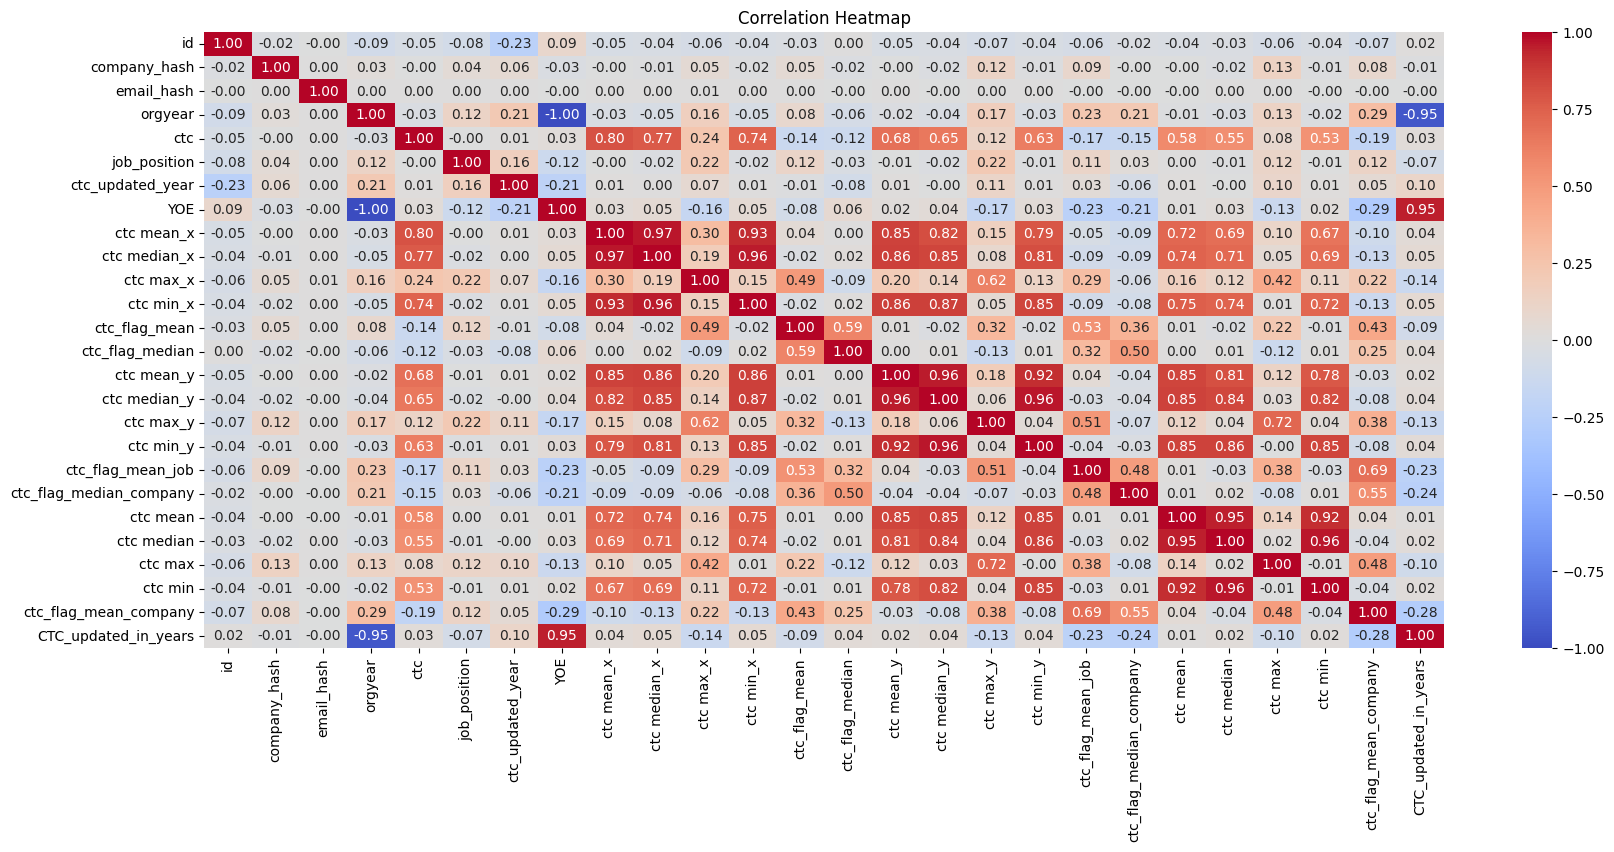

In [290]:
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

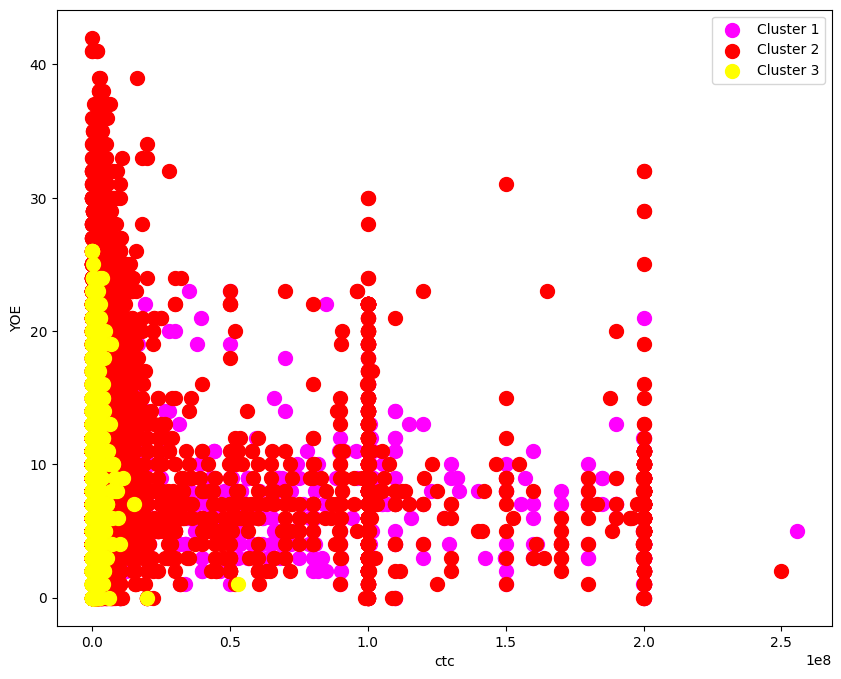

In [305]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(df_manual_clustering_scaled[df_manual_clustering_scaled['ctc_flag_mean'] == 1]['ctc'], df_manual_clustering_scaled[df_manual_clustering_scaled['ctc_flag_mean'] == 1]['YOE'], s=100, c='Magenta', label = 'Cluster 1')
plt.scatter(df_manual_clustering_scaled[df_manual_clustering_scaled['ctc_flag_mean'] == 2]['ctc'], df_manual_clustering_scaled[df_manual_clustering_scaled['ctc_flag_mean'] == 2]['YOE'], s=100, c='Red', label = 'Cluster 2')
plt.scatter(df_manual_clustering_scaled[df_manual_clustering_scaled['ctc_flag_mean'] == 3]['ctc'], df_manual_clustering_scaled[df_manual_clustering_scaled['ctc_flag_mean'] == 3]['YOE'], s=100, c='Yellow', label = 'Cluster 3')

plt.xlabel('ctc')
plt.ylabel('YOE')
plt.legend()
plt.show()

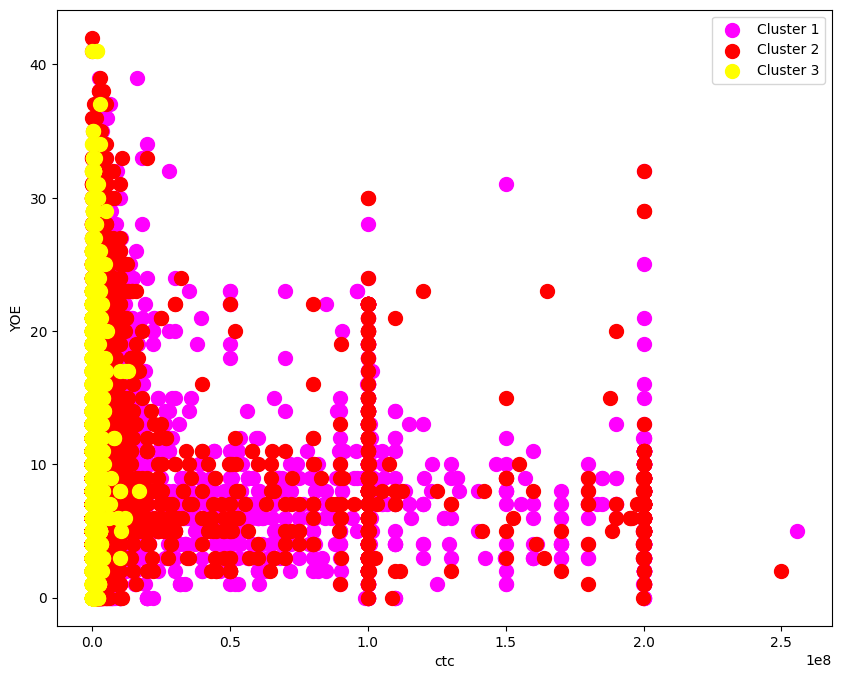

In [304]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(df_manual_clustering_scaled[df_manual_clustering_scaled['ctc_flag_mean_company'] == 1]['ctc'], df_manual_clustering_scaled[df_manual_clustering_scaled['ctc_flag_mean_company'] == 1]['YOE'], s=100, c='Magenta', label = 'Cluster 1')
plt.scatter(df_manual_clustering_scaled[df_manual_clustering_scaled['ctc_flag_mean_company'] == 2]['ctc'], df_manual_clustering_scaled[df_manual_clustering_scaled['ctc_flag_mean_company'] == 2]['YOE'], s=100, c='Red', label = 'Cluster 2')
plt.scatter(df_manual_clustering_scaled[df_manual_clustering_scaled['ctc_flag_mean_company'] == 3]['ctc'], df_manual_clustering_scaled[df_manual_clustering_scaled['ctc_flag_mean_company'] == 3]['YOE'], s=100, c='Yellow', label = 'Cluster 3')

plt.xlabel('ctc')
plt.ylabel('YOE')
plt.legend()
plt.show()

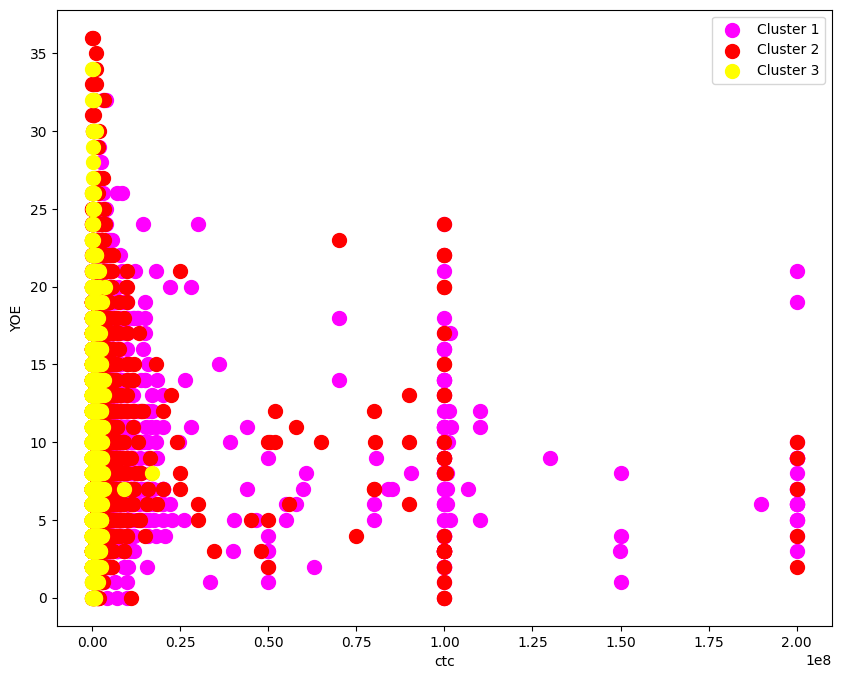

In [306]:
# also lets see for any particular job position
df_job = df_manual_clustering_scaled[df_manual_clustering_scaled['job_position']==140]
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(df_job[df_job['ctc_flag_mean_job'] == 1]['ctc'], df_job[df_job['ctc_flag_mean_job'] == 1]['YOE'], s=100, c='Magenta', label = 'Cluster 1')
plt.scatter(df_job[df_job['ctc_flag_mean_job'] == 2]['ctc'], df_job[df_job['ctc_flag_mean_job'] == 2]['YOE'], s=100, c='Red', label = 'Cluster 2')
plt.scatter(df_job[df_job['ctc_flag_mean_job'] == 3]['ctc'], df_job[df_job['ctc_flag_mean_job'] == 3]['YOE'], s=100, c='Yellow', label = 'Cluster 3')

plt.xlabel('ctc')
plt.ylabel('YOE')
plt.legend()
plt.show()

### Manual clustering doesnot create clean clusters.
#### We had used mean/median of CTC in company / company & job role / company, job role & YOE to create 3 flags used as prediction label to cluster above.
We also see strong correlation between CTC updation in years & Years of Experience. Also between CTC & CTC mean in company.

In [294]:
# get top 10 companies
top_10_companies = df_manual_clustering.nlargest(10, 'ctc mean_y')['company_hash']
top_10_companies.values

array(['aveegaxr xzntqzvnxgzvr hzxctqoxnj', 'oxburjyq ogrhnxgzo rru',
       'ihvrxnvo srgmvr rru', 'uvqp wgbuhntq ojontb xzw',
       'xfgqp ntwyzgrgsxto', 'outwnqt vzvrjnxwv', 'twgbtduqtoo',
       'ofvr xzegntwy ucn rna', 'nvrtzn ouvwt xzw', 'zxoyvzn wgbuhntqo'],
      dtype=object)

In [295]:
filtered_df = df_manual_clustering[df_manual_clustering['ctc_flag_mean_company'] == 1]
distinct_values = filtered_df['company_hash'].unique()
print(distinct_values)

['bgsrxd' 'nxbto xzntqztn' 'qxenxg' ... 'ujut ntwyzgrgsxto' 'nvqvbo'
 'oyguwg']


In [296]:
# get top 2 job positions
top_2_positions = df_manual_clustering.nlargest(3, 'ctc mean_y')['job_position']
distinct_positions = top_2_positions.unique()
distinct_positions

array(['Unknown', 'Support Engineer', 'QA Engineer'], dtype=object)

In [297]:
filtered_df = df_manual_clustering[df_manual_clustering['ctc_flag_mean_job'] == 1]
distinct_values = filtered_df['job_position'].unique()
print(distinct_values)

['FullStack Engineer' 'Backend Engineer' 'Unknown' 'Frontend Engineer'
 'Android Engineer' 'QA Engineer' 'Other' 'Data Scientist'
 'Support Engineer' 'Data Analyst' 'SDET' 'Engineering Leadership'
 'Engineering Intern' 'Devops Engineer' 'Research Engineers'
 'iOS Engineer' 'Database Administrator' 'Product Manager' 'Co-founder'
 'Student' 'Program Manager' 'Backend Architect' 'Release Engineer'
 'Product Designer' 'Software Development Engineer - II' 'Non Coder'
 'Engineer' 'Security Leadership' 'Associate' 'Project Engineer'
 'System Engineer' 'project engineer' 'SDE II'
 'Business Technology Analyst' 'Software Engineer (Backend)' 'SDE 1'
 'SDE 2' 'Software Engineer 2' 'SDE-1' 'Fullstack Engineer' 'Na' 'None'
 'Software Development Engineer - I'
 'Application development senior analyst'
 'Assistant System Engineer Trainee' 'SDE2' 'Associate Consultant'
 'Software Development Engineer Intern' 'Senior  Software Engineer'
 'MTS-2' 'Teaching Assistant' 'Sr Software Engineer']


In [298]:
## Get the top 10 employees
sorted_df = df_manual_clustering.sort_values(by='ctc', ascending=False)
top_10_employees = sorted_df['id'].head(10)
top_10_employees.values

array([117948,   3301,   9763, 103894,  16603,  20196,  90189,  10405,
        60429,    836])

In [299]:
filtered_df = df_manual_clustering[df_manual_clustering['ctc_flag_mean'] == 1]
distinct_values = filtered_df['id'].unique()
print(distinct_values)

[    17     25     38 ... 206887 206900 206916]


In [300]:
## Get the bottom 10 employees
sorted_df = df_manual_clustering.sort_values(by='ctc', ascending=True)
bottom_10_employees = sorted_df['id'].head(10)
bottom_10_employees.values

array([135886, 118549, 114452, 185851, 184706,  54885,  91723, 117256,
       167115,  82161])

In [301]:
filtered_df = df_manual_clustering[df_manual_clustering['ctc_flag_mean'] == 3]
distinct_values = filtered_df['id'].unique()
print(distinct_values)

[    14     20     59 ... 206910 206917 206919]


In [302]:
## Get the top 10 employees by job position
sorted_df = df_manual_clustering.sort_values(by='ctc mean_x', ascending=False)
top_10_employees = sorted_df['id'].head(10)
top_10_employees.values

array([ 3301, 23067, 12612,  2824, 20196, 29753,   361, 20184,  2793,
       22640])

In [303]:
filtered_df = df_manual_clustering[df_manual_clustering['ctc_flag_mean_job'] == 1]
distinct_values = filtered_df['id'].unique()
print(distinct_values)

[     4     15     17 ... 206876 206887 206903]


In [167]:
# Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X

df_filtered = df_manual_clustering[(df_manual_clustering['YOE'] >= 5) & (df_manual_clustering['YOE'] <= 7) & (df_manual_clustering['ctc_flag_mean_company']==1)]

df_sorted = df_filtered.sort_values(by=['ctc', 'job_position'], ascending=[False, True])

top_10_employees = df_filtered.groupby(['company_hash'], group_keys=True).apply(
    lambda x: x.nlargest(10, 'ctc')
)

top_10_employees

id company_hash  \
company_hash                               
01 ojztqsj   74315    74535   01 ojztqsj   
1bs          128317  128911          1bs   
             138145  138817          1bs   
             167432  168383          1bs   
             205082  206430          1bs   
...                     ...          ...   
zxzlvwvqn    33776    33885    zxzlvwvqn   
             57419    57586    zxzlvwvqn   
             56282    56447    zxzlvwvqn   
zxztrtvuo    196545  197815    zxztrtvuo   
             17377    17423    zxztrtvuo   

                                                                           email_hash  \
company_hash                                                                            
01 ojztqsj   74315   819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c02b81ac1447cbd6386   
1bs          128317  9977fcf096a81795abeb0829760e399a0a7a727ebf8bbb2f975a66dbac3c5326   
             138145  9977fcf096a81795abeb0829760e399a0a7a727ebf8bbb2f975a66dbac3c5326   
             167432  d0d06e9bb510f55e1e26e25cc8e1f6dfbe31384d3864a5bbb5bf7e3c3a21ebc7   
             205082  6eb6cb9918e8eceb347c37797a75e08f94c2050b857258f10609799502151a83   
...                                                                               ...   
zxzlvwvqn    33776   4b083429e503553fb88ede06604aceccef192b2501226318f00d9eebdcde748b   
             57419   4b083429e503553fb88ede06604aceccef192b2501226318f00d9eebdcde748b   
             56282   d22eddf77b769126fdb8f25fe69489204d7f1b8fe18bb12b8ffbd0522c3e24c5   
zxztrtvuo    196545  b5628c03989a151f60c89e726351817c3a62078e7c70deb9351e3b51c69c012f   
             17377   41367fd92cd85ecfa2e2ce76f4ff94cde287b95df93871713fe4f52c7c61c000   

                     orgyear     ctc             job_position  \
company_hash                                                    
01 ojztqsj   74315    2016.0  270000         Android Engineer   
1bs          128317   2017.0  700000              QA Engineer   
             138145   2017.0  700000                     SDET   
             167432   2017.0  700000         Android Engineer   
             205082   2018.0  700000                  Unknown   
...                      ...     ...                      ...   
zxzlvwvqn    33776    2017.0  600000                  Unknown   
             57419    2017.0  600000  Area Operations Manager   
             56282    2017.0  500000         Backend Engineer   
zxztrtvuo    196545   2016.0  575000       FullStack Engineer   
             17377    2018.0  570000        Frontend Engineer   

                     ctc_updated_year  YOE    ctc mean_x  ctc median_x  \
company_hash                                                             
01 ojztqsj   74315             2019.0  7.0  2.700000e+05      270000.0   
1bs          128317            2019.0  6.0  7.000000e+05      700000.0   
             138145            2019.0  6.0  7.000000e+05      700000.0   
             167432            2019.0  6.0  7.000000e+05      700000.0   
             205082            2021.0  5.0  9.200000e+05      800000.0   
...                               ...  ...           ...           ...   
zxzlvwvqn    33776             2021.0  6.0  1.800000e+06     1800000.0   
             57419             2021.0  6.0  6.000000e+05      600000.0   
             56282             2020.0  6.0  1.740000e+06     1730000.0   
zxztrtvuo    196545            2019.0  7.0  8.993333e+05      923000.0   
             17377             2019.0  5.0  5.850000e+05      585000.0   

                     ctc max_x  ctc min_x  ctc_flag_mean  ctc_flag_median  \
company_hash                                                                
01 ojztqsj   74315      270000     270000              2                2   
1bs          128317     700000     700000              2                2   
             138145     700000     700000              2                2   
             167432     700000     700000              2                2   
             205082    

## Clustering using KMeans, GMM & Hierarchical methods

In [168]:
df = df_manual_clustering.copy()
df

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,ctc mean_x,ctc median_x,ctc max_x,ctc min_x,ctc_flag_mean,ctc_flag_median,ctc mean_y,ctc median_y,ctc max_y,ctc min_y,ctc_flag_mean_company,ctc_flag_median_company,CTC_updated_in_years
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,2016.0,1100000,Other,2020.0,7.0,1.100000e+06,1100000.0,1100000,1100000,2,2,1.115667e+06,1070000.0,1771000,500000,2,2,4.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,2018.0,449999,FullStack Engineer,2019.0,5.0,7.742856e+05,750000.0,1200000,449999,2,2,2.197334e+06,900000.0,200000000,10000,1,1,1.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2015.0,2000000,Backend Engineer,2020.0,8.0,2.000000e+06,2000000.0,2000000,2000000,2,2,2.000000e+06,2000000.0,2000000,2000000,2,2,5.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,2017.0,700000,Backend Engineer,2019.0,6.0,1.158571e+06,1200000.0,1750000,700000,2,2,1.713929e+06,1400000.0,4700000,200000,1,2,2.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,2017.0,1400000,FullStack Engineer,2019.0,6.0,1.400000e+06,1400000.0,1400000,1400000,2,2,9.400000e+05,850000.0,1400000,540000,2,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205569,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,2008.0,220000,Unknown,2019.0,15.0,2.200000e+05,220000.0,220000,220000,2,2,1.681941e+06,2300000.0,3500000,60000,1,1,11.0
205570,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,2017.0,500000,Unknown,2020.0,6.0,1.150000e+06,1450000.0,1500000,500000,1,1,2.119245e+06,1200000.0,74200000,200000,1,1,3.0
205571,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,2021.0,700000,Unknown,2021.0,2.0,6.666667e+05,700000.0,1000000,300000,2,2,1.404485e+06,1300000.0,4800000,200000,1,2,0.0
205572,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,2019.0,5100000,Unknown,2019.0,4.0,5.920732e+06,710000.0,180000000,7300,2,3,5.477717e+06,800000.0,200000000,7300,2,3,0.0


In [169]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the categorical data and transform the data
df['company_hash'] = label_encoder.fit_transform(df['company_hash'])
df['email_hash'] = label_encoder.fit_transform(df['email_hash'])
df['job_position'] = label_encoder.fit_transform(df['job_position'])
df

,id,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,YOE,ctc mean_x,ctc median_x,ctc max_x,ctc min_x,ctc_flag_mean,ctc_flag_median,ctc mean_y,ctc median_y,ctc max_y,ctc min_y,ctc_flag_mean_company,ctc_flag_median_company,CTC_updated_in_years
0,0,967,65689,2016.0,1100000,458,2020.0,7.0,1.100000e+06,1100000.0,1100000,1100000,2,2,1.115667e+06,1070000.0,1771000,500000,2,2,4.0
1,1,19690,105755,2018.0,449999,292,2019.0,5.0,7.742856e+05,750000.0,1200000,449999,2,2,2.197334e+06,900000.0,200000000,10000,1,1,1.0
2,2,15482,43239,2015.0,2000000,140,2020.0,8.0,2.000000e+06,2000000.0,2000000,2000000,2,2,2.000000e+06,2000000.0,2000000,2000000,2,2,5.0
3,3,12085,143658,2017.0,700000,140,2019.0,6.0,1.158571e+06,1200000.0,1750000,700000,2,2,1.713929e+06,1400000.0,4700000,200000,1,2,2.0
4,4,20186,66892,2017.0,1400000,292,2019.0,6.0,1.400000e+06,1400000.0,1400000,1400000,2,2,9.400000e+05,850000.0,1400000,540000,2,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205569,206918,28705,66934,2008.0,220000,954,2019.0,15.0,2.200000e+05,220000.0,220000,220000,2,2,1.681941e+06,2300000.0,3500000,60000,1,1,11.0
205570,206919,8491,76135,2017.0,500000,954,2020.0,6.0,1.150000e+06,1450000.0,1500000,500000,1,1,2.119245e+06,1200000.0,74200000,200000,1,1,3.0
205571,206920,29038,121480,2021.0,700000,954,2021.0,2.0,6.666667e+05,700000.0,1000000,300000,2,2,1.404485e+06,1300000.0,4800000,200000,1,2,0.0
205572,206921,35968,150460,2019.0,5100000,954,2019.0,4.0,5.920732e+06,710000.0,180000000,7300,2,3,5.477717e+06,800000.0,200000000,7300,2,3,0.0


In [69]:
df.columns

Index(['id', 'company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'YOE', 'ctc mean_x', 'ctc median_x', 'ctc max_x',
       'ctc min_x', 'ctc_flag_mean', 'ctc_flag_median', 'ctc mean_y',
       'ctc median_y', 'ctc max_y', 'ctc min_y', 'ctc_flag_mean_company',
       'ctc_flag_median_company', 'CTC_updated_in_years'],
      dtype='object')

## PCA

In [70]:
df_cluster_pca = df[['job_position', 'ctc', 'YOE', 'ctc mean_x', 'ctc mean_y', 'CTC_updated_in_years']] # we will cluster based on CTC & YOE
df_cluster_pca

,job_position,ctc,YOE,ctc mean_x,ctc mean_y,CTC_updated_in_years
0,458,1100000,7.0,1.100000e+06,1.115667e+06,4.0
1,292,449999,5.0,7.742856e+05,2.197334e+06,1.0
2,140,2000000,8.0,2.000000e+06,2.000000e+06,5.0
3,140,700000,6.0,1.158571e+06,1.713929e+06,2.0
4,292,1400000,6.0,1.400000e+06,9.400000e+05,2.0
...,...,...,...,...,...,...
205569,954,220000,15.0,2.200000e+05,1.681941e+06,11.0
205570,954,500000,6.0,1.150000e+06,2.119245e+06,3.0
205571,954,700000,2.0,6.666667e+05,1.404485e+06,0.0
205572,954,5100000,4.0,5.920732e+06,5.477717e+06,0.0


In [71]:
scaler = StandardScaler()
X_cluster_pca = scaler.fit_transform(df_cluster_pca)
X_cluster_pca

array([[-0.03633311, -0.10041986, -0.20925941, -0.12594359, -0.17140339,
        -0.12336313],
       [-0.54040269, -0.15657538, -0.68269025, -0.16123523, -0.00972009,
        -0.84614513],
       [-1.00196037, -0.02266618,  0.02745601, -0.02842725, -0.03921674,
         0.1175642 ],
       ...,
       [ 1.46980251, -0.13497705, -1.39283651, -0.1728959 , -0.12823194,
        -1.08707246],
       [ 1.46980251,  0.24515205, -0.91940567,  0.39638993,  0.4806186 ,
        -1.08707246],
       [ 1.46980251, -0.08832484,  0.26417143, -0.06165504,  0.0225475 ,
        -0.60521779]])

In [72]:
cov_X_st = np.matmul(X_cluster_pca.T, X_cluster_pca)/(len(X_cluster_pca)-1)

In [73]:
eigenvalues, eigenvectors = np.linalg.eig(cov_X_st)
print(eigenvalues)
print(eigenvectors)

[2.41261484 1.96065299 0.98237182 0.42782339 0.048669   0.16789715]
[[-0.01453905  0.1379314   0.9896253  -0.00891342 -0.03631253  0.00269483]
 [ 0.56692195  0.07530792 -0.00638234 -0.62166935 -0.00199121 -0.53517357]
 [ 0.0955654  -0.69547896  0.07244463  0.0093261  -0.70838454 -0.0056926 ]
 [ 0.60361524  0.0773669  -0.00520254 -0.11587351 -0.00289174  0.78498465]
 [ 0.54332995  0.08680309  0.00375237  0.77453531  0.00116475 -0.31198942]
 [ 0.09847122 -0.69144215  0.12374029  0.00540191  0.7048823  -0.00335797]]


In [74]:
(eigenvalues[0]+eigenvalues[1]+eigenvalues[2])  / eigenvalues.sum()

0.8926022665385465

In [75]:
eigenvectors = eigenvectors.T
X_prime = eigenvectors[0].dot(X_cluster_pca.T)
X_prime_reduced = X_prime
print(X_prime_reduced)

[-0.25769772 -0.33207685 -0.02254862 ... -0.51207817  0.4231053
 -0.1307589 ]


In [76]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pcafit = pca.fit(X_cluster_pca)
percentExplained = pca.explained_variance_ratio_.sum()
print(percentExplained)

0.8926022665385476


In [77]:
principal_components = pca.fit_transform(X_cluster_pca)
principal_components

array([[-0.25769772, -0.19363789, -0.0657279 ],
       [-0.33207685, -0.96020924, -0.68715398],
       [-0.02254862,  0.24589612, -0.97488347],
       ...,
       [-0.51207817, -1.88839593,  1.22041535],
       [ 0.4231053 , -1.68465546,  1.25160966],
       [-0.1307589 , -0.4280149 ,  1.39977081]])

## Clustering using CTC & YOE for job position

In [78]:
df = df[['job_position', 'ctc', 'YOE']] # we will cluster based on CTC & YOE
df

,job_position,ctc,YOE
0,458,1100000,7.0
1,292,449999,5.0
2,140,2000000,8.0
3,140,700000,6.0
4,292,1400000,6.0
...,...,...,...
205569,954,220000,15.0
205570,954,500000,6.0
205571,954,700000,2.0
205572,954,5100000,4.0


In [79]:
df.isna().sum()

job_position    0
ctc             0
YOE             0
dtype: int64

In [80]:
X = df

In [81]:
# Standardisation
# lets do standard scaling now
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.03633311, -0.10041986, -0.20925941],
       [-0.54040269, -0.15657538, -0.68269025],
       [-1.00196037, -0.02266618,  0.02745601],
       ...,
       [ 1.46980251, -0.13497705, -1.39283651],
       [ 1.46980251,  0.24515205, -0.91940567],
       [ 1.46980251, -0.08832484,  0.26417143]])

Silhouette Score

In [82]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [69]:
# Checking clustering tendency
silhouette_avg = silhouette_score(X, KMeans(n_clusters=4).fit_predict(X))
print(f'Silhouette Score for original data: {silhouette_avg:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for original data: 0.97


A high Silhouette Score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. This suggests that the clustering is appropriate.


## KMeans & Elbow method to find no of clusters to create

In [90]:

# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

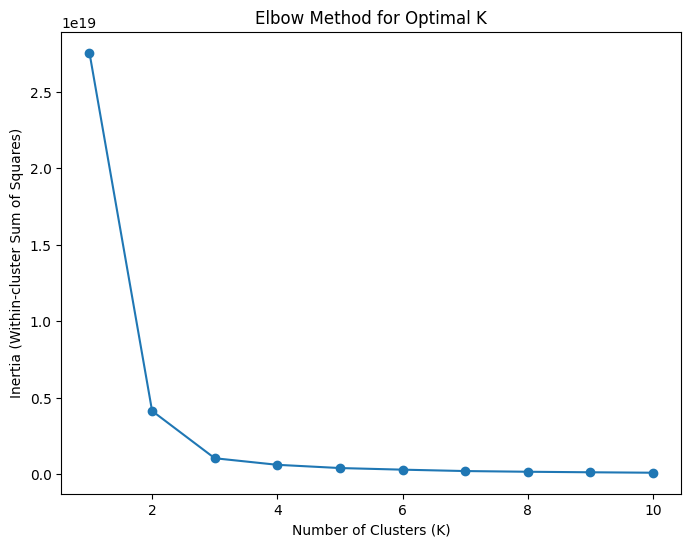

In [91]:
# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.show()



Based on the Elbow method, let's choose K=4

In [117]:
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k, init = 'k-means++')
y_pred = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [118]:

# from sklearn.cluster import KMeans

# k = 4
# kmeans = KMeans(n_clusters=k, init = 'k-means++')
# y_pred = kmeans.fit_predict(principal_components)

### On testing with PCA components, the results were not very good!!

In [119]:
df['predicted_label'] = y_pred

<ipython-input-119-60de8de49a36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_label'] = y_pred


In [120]:
df

,job_position,ctc,YOE,predicted_label
0,458,1100000,7.0,1
1,292,449999,5.0,1
2,140,2000000,8.0,1
3,140,700000,6.0,1
4,292,1400000,6.0,1
...,...,...,...,...
205569,954,220000,15.0,2
205570,954,500000,6.0,0
205571,954,700000,2.0,0
205572,954,5100000,4.0,0


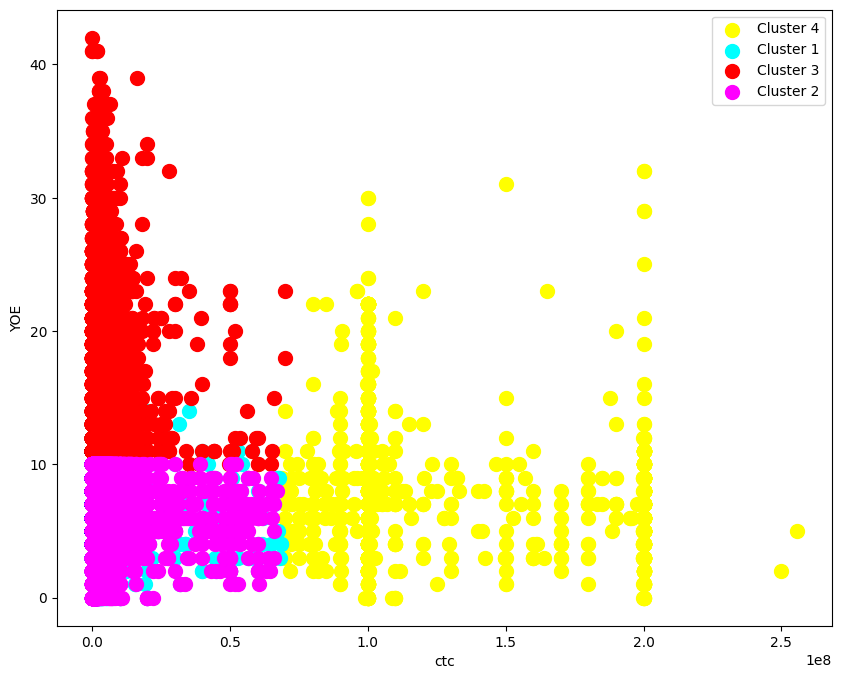

In [123]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(df[df['predicted_label'] == 3]['ctc'], df[df['predicted_label'] == 3]['YOE'], s=100, c='Yellow', label = 'Cluster 4')
plt.scatter(df[df['predicted_label'] == 0]['ctc'], df[df['predicted_label'] == 0]['YOE'], s=100, c='Cyan', label = 'Cluster 1')
plt.scatter(df[df['predicted_label'] == 2]['ctc'], df[df['predicted_label'] == 2]['YOE'], s=100, c='Red', label = 'Cluster 3')
plt.scatter(df[df['predicted_label'] == 1]['ctc'], df[df['predicted_label'] == 1]['YOE'], s=100, c='Magenta', label = 'Cluster 2')

plt.xlabel('ctc')
plt.ylabel('YOE')
plt.legend()
plt.show()

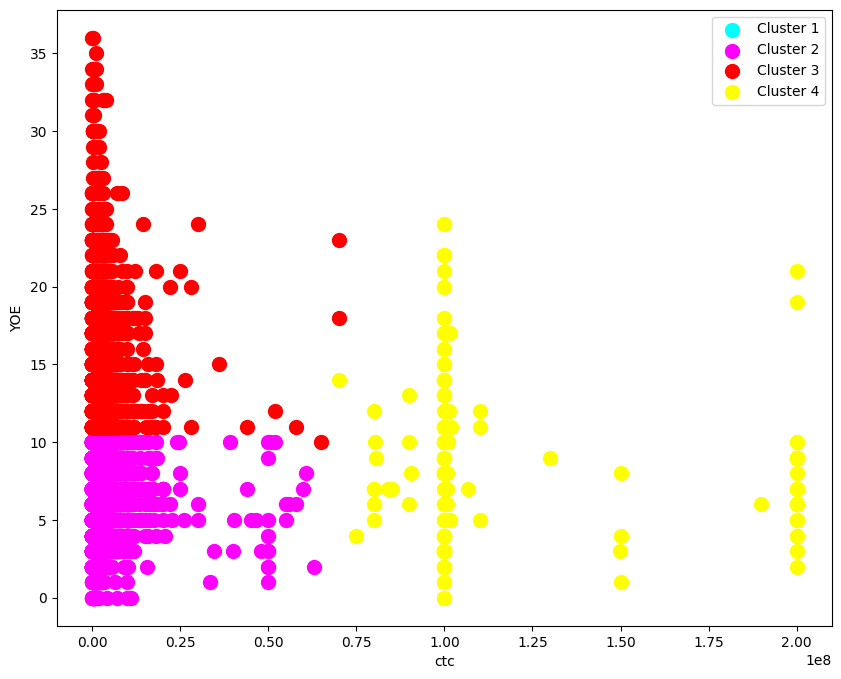

In [122]:
# also lets see for any particular job position
df_job = df[df['job_position']==140]
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(df_job[df_job['predicted_label'] == 0]['ctc'], df_job[df_job['predicted_label'] == 0]['YOE'], s=100, c='Cyan', label = 'Cluster 1')
plt.scatter(df_job[df_job['predicted_label'] == 1]['ctc'], df_job[df_job['predicted_label'] == 1]['YOE'], s=100, c='Magenta', label = 'Cluster 2')
plt.scatter(df_job[df_job['predicted_label'] == 2]['ctc'], df_job[df_job['predicted_label'] == 2]['YOE'], s=100, c='Red', label = 'Cluster 3')
plt.scatter(df_job[df_job['predicted_label'] == 3]['ctc'], df_job[df_job['predicted_label'] == 3]['YOE'], s=100, c='Yellow', label = 'Cluster 4')

plt.xlabel('ctc')
plt.ylabel('YOE')
plt.legend()
plt.show()

We see clear boundary of cluster in case of particular job position (which we visualised) but a little overlap in Cluster 2 & Cluster 4

In [99]:
X.shape

(205574, 4)

GMM

In [113]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X_scaled)
y_pred = gmm.predict(X_scaled)

In [114]:
df['predicted_label'] = y_pred

<ipython-input-114-60de8de49a36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_label'] = y_pred


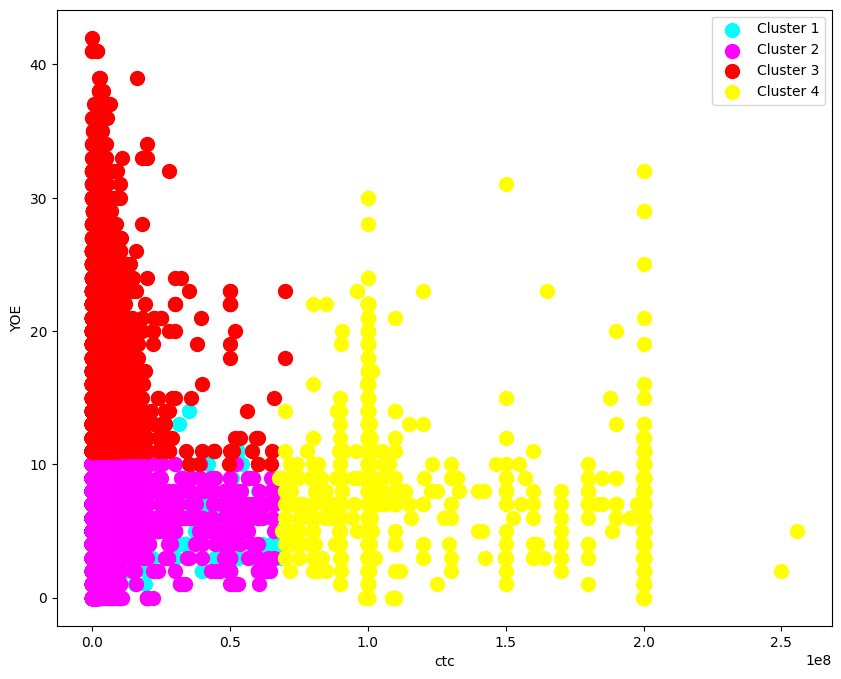

In [124]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(df[df['predicted_label'] == 0]['ctc'], df[df['predicted_label'] == 0]['YOE'], s=100, c='Cyan', label = 'Cluster 1')
plt.scatter(df[df['predicted_label'] == 1]['ctc'], df[df['predicted_label'] == 1]['YOE'], s=100, c='Magenta', label = 'Cluster 2')
plt.scatter(df[df['predicted_label'] == 2]['ctc'], df[df['predicted_label'] == 2]['YOE'], s=100, c='Red', label = 'Cluster 3')
plt.scatter(df[df['predicted_label'] == 3]['ctc'], df[df['predicted_label'] == 3]['YOE'], s=100, c='Yellow', label = 'Cluster 4')

plt.xlabel('ctc')
plt.ylabel('YOE')
plt.legend()
plt.show()

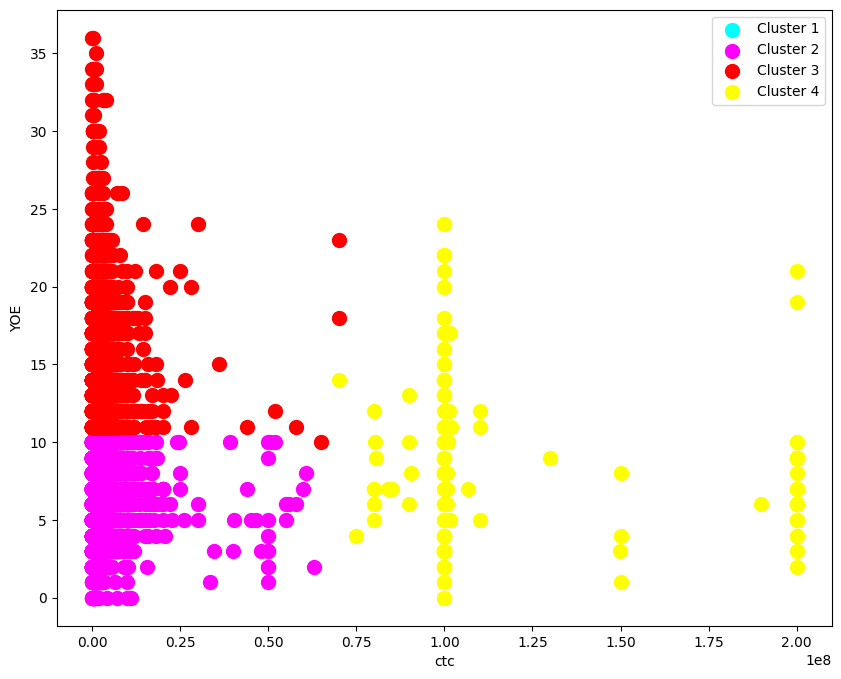

In [125]:
# also lets see for any particular job position
df_job = df[df['job_position']==140]
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(df_job[df_job['predicted_label'] == 0]['ctc'], df_job[df_job['predicted_label'] == 0]['YOE'], s=100, c='Cyan', label = 'Cluster 1')
plt.scatter(df_job[df_job['predicted_label'] == 1]['ctc'], df_job[df_job['predicted_label'] == 1]['YOE'], s=100, c='Magenta', label = 'Cluster 2')
plt.scatter(df_job[df_job['predicted_label'] == 2]['ctc'], df_job[df_job['predicted_label'] == 2]['YOE'], s=100, c='Red', label = 'Cluster 3')
plt.scatter(df_job[df_job['predicted_label'] == 3]['ctc'], df_job[df_job['predicted_label'] == 3]['YOE'], s=100, c='Yellow', label = 'Cluster 4')

plt.xlabel('ctc')
plt.ylabel('YOE')
plt.legend()
plt.show()

Using GMM, we see more than 10 Lakhs CTC seems to be clustered as Cluster 3 with no variation due to YOE. For other clusters we see 0-15, 15-25 & 25+ YOE cluster within 10 Lakhs CTC.

In [126]:
df_job.shape

(43521, 4)

In [83]:
sampled_X = df.sample(n=5000) # using 5000 columns to do Hierarchial Clustering
sampled_X

,job_position,ctc,YOE
50879,140,145000,6.0
92967,140,700000,6.0
85651,140,2400000,10.0
65467,287,930000,10.0
63279,140,1650000,7.0
...,...,...,...
85268,954,1500000,3.0
26380,954,630000,3.0
188433,292,1050000,4.0
89863,292,1350000,8.0


Hierarchical clustering

In [129]:
import scipy.cluster.hierarchy as sch
Z = sch.linkage(sampled_X, method='ward') #linkage = ward

Text(0, 0.5, 'distance')

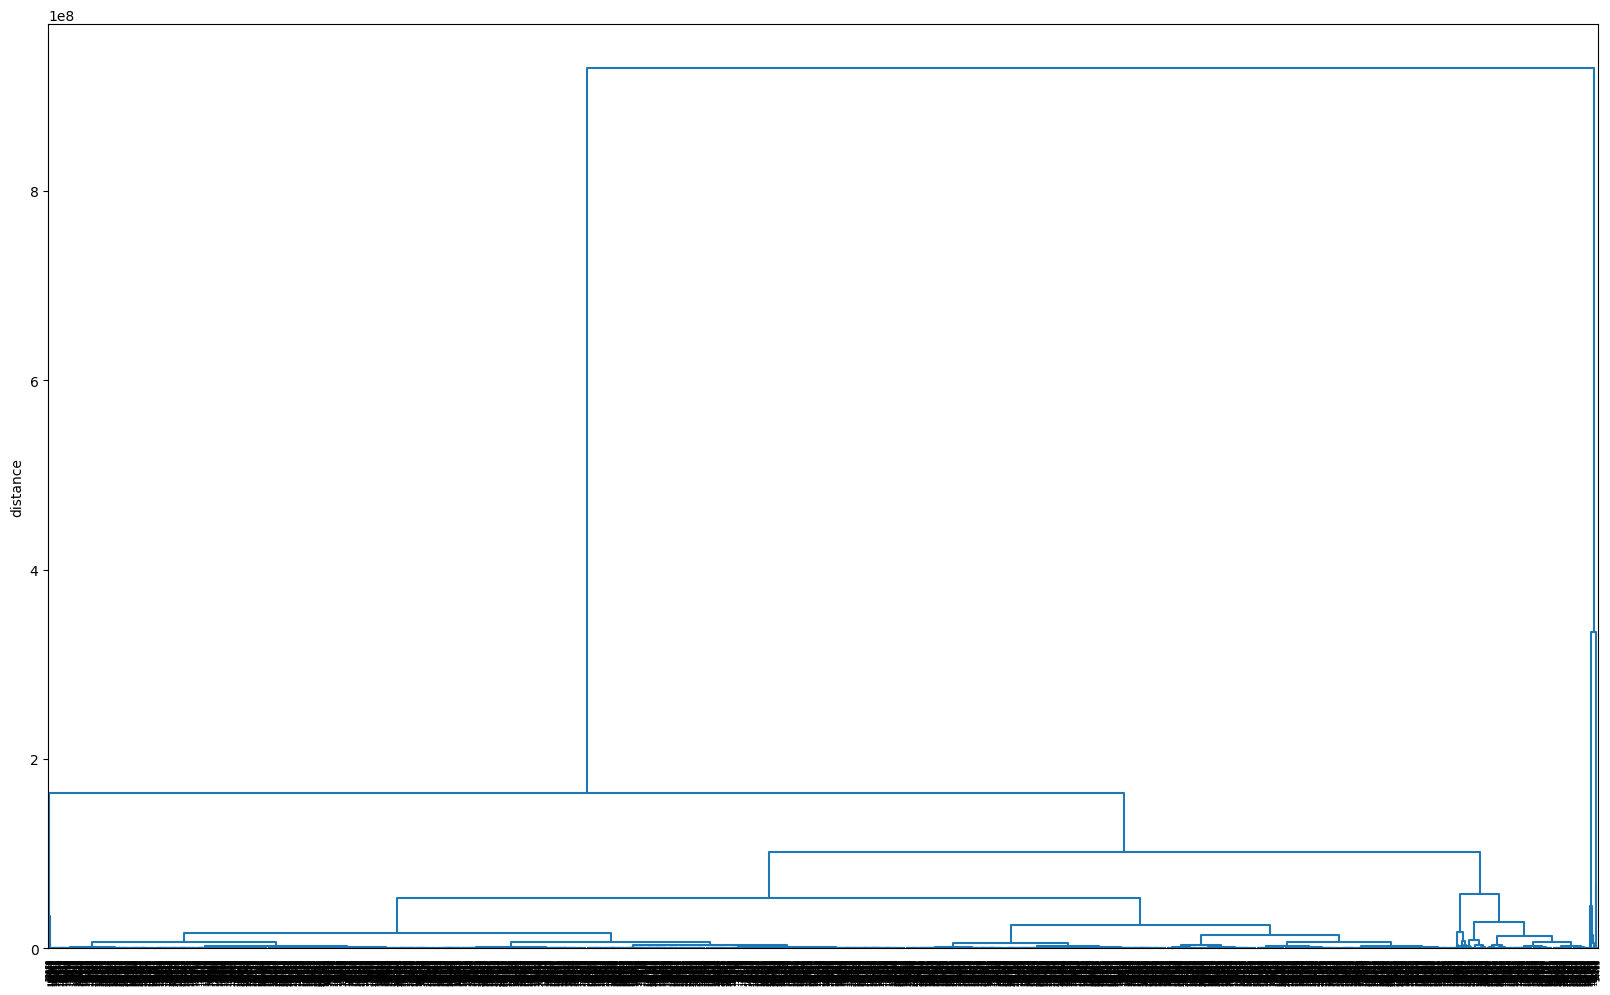

In [130]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sampled_X.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

In [84]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering

# create clusters
agglo = AgglomerativeClustering(n_clusters=4, linkage = 'ward')
y_pred = agglo.fit_predict(sampled_X)
y_pred

In [85]:
viz_df = sampled_X
viz_df['predicted_label'] = y_pred

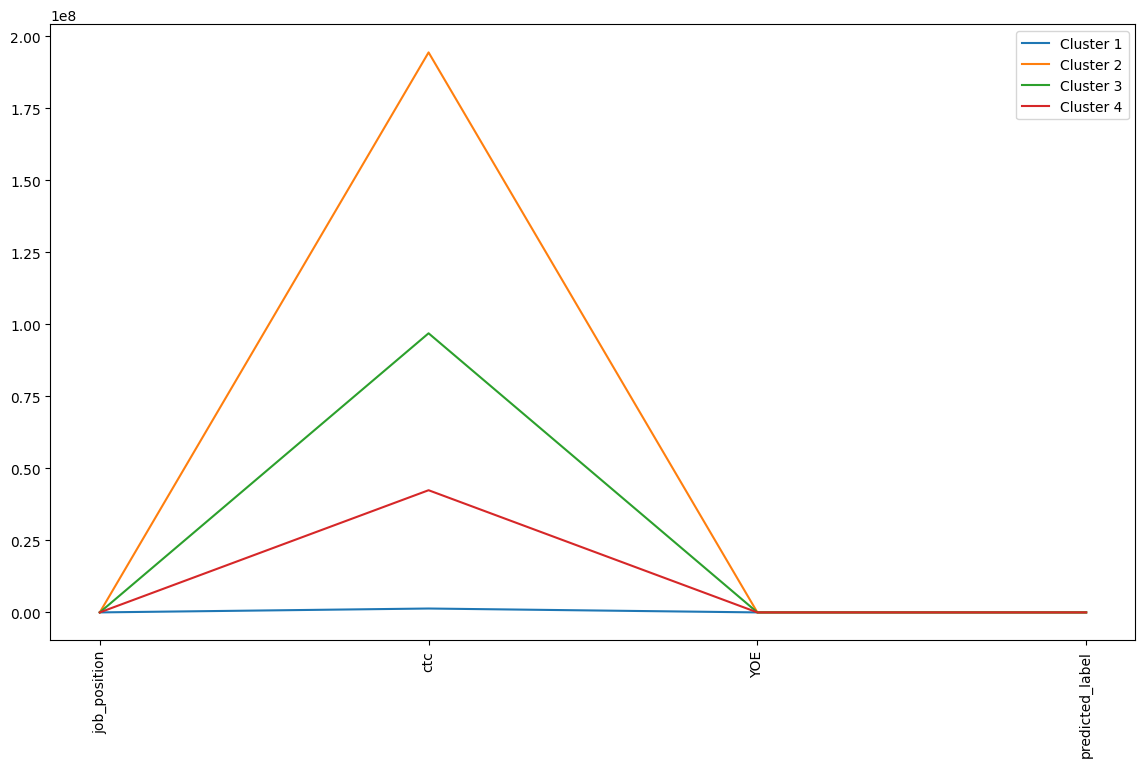

In [133]:
#Plot a line graph to see the characteristics of the clusters
viz_df['label'] = pd.Series(y_pred, index=viz_df.index)

clustered_df = viz_df.groupby('label').mean()

labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

plt.figure(figsize=(14,8))
plt.plot(clustered_df.T, label=labels)
plt.xticks(rotation=90)
plt.legend(labels)


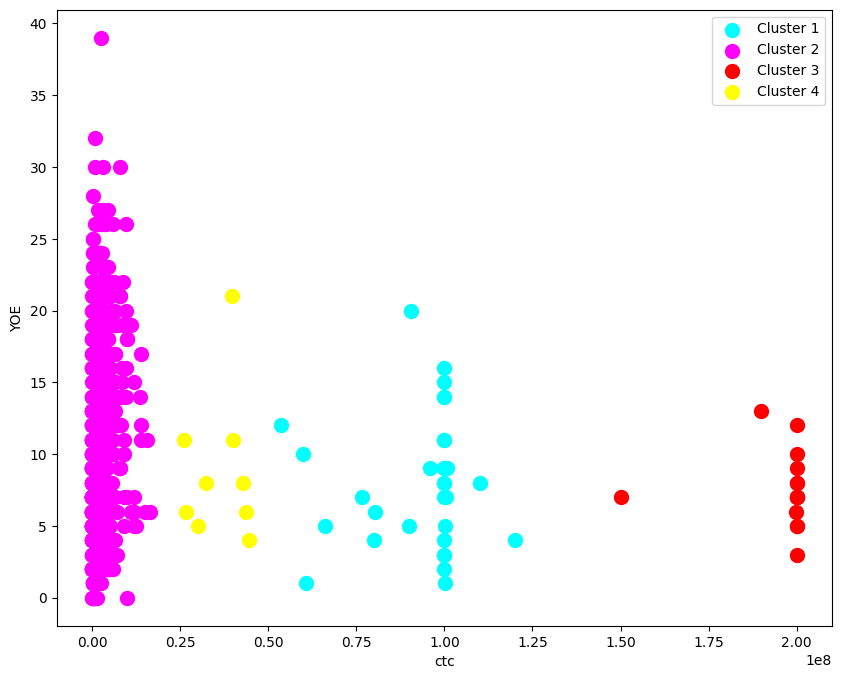

In [86]:
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(viz_df[viz_df['predicted_label'] == 0]['ctc'], viz_df[viz_df['predicted_label'] == 0]['YOE'], s=100, c='Cyan', label = 'Cluster 1')
plt.scatter(viz_df[viz_df['predicted_label'] == 1]['ctc'], viz_df[viz_df['predicted_label'] == 1]['YOE'], s=100, c='Magenta', label = 'Cluster 2')
plt.scatter(viz_df[viz_df['predicted_label'] == 2]['ctc'], viz_df[viz_df['predicted_label'] == 2]['YOE'], s=100, c='Red', label = 'Cluster 3')
plt.scatter(viz_df[viz_df['predicted_label'] == 3]['ctc'], viz_df[viz_df['predicted_label'] == 3]['YOE'], s=100, c='Yellow', label = 'Cluster 4')

plt.xlabel('ctc')
plt.ylabel('YOE')
plt.legend()
plt.show()

## Insights & Recommendations

1. While doing Manual clustering, we could not see any clear distinction in clusters created using mean/median of CTC. We created Designation Flag, Class Flag & Tier Flag. We were trying to cluster YOE to CTC for clusters created. Although we can use the CTC flag values for top & bottom employees based on  job position, company_id and YOE to categorise & finding employees of each cluster. Flag value 1 being top & 3 being bottom.
2. With YOE 8-12 years, CTC has big range with 8 years work experience having most of it. According to data, it doesnot matter on YOE for CTC, CTC ranges depend on other things also. Data for 8-12 YOE is also more.
3. There is negative correlation between CTC updated year & YOE. It makes sense that CTC updation decreases as YOE increases. Promotion to Manager/Sr Manager takes more years.
4. Mostly people got increment (ctc updated) in years 2019 to 2021. Although, people have been working from 2009-2021 (orgyear). This may be inferred that these 3 years market was very good.
5. Mostly dataset contains data with people having 3-12 years of experience. We can try to collect data for other experience years. Also, density of data is not consistent, we can use SMOTE to tackle it but prefer to have original data as it is unssupervised learning.
6. While we did Clustering using KMeans, we found that ideal clusters value of 4 using Elbow method. We see quite good clustering and clean distinctions when K=4. We can infer:
  *   Cluster 1 - Employees with less experience and fairly good CTC --> Fairly CTC receiving employees
  *   Cluster 2 - Employees having Years of Experience (YOE) as less than 10 years and CTC less than 7.5 Lakhs. ---> Regular employees
  *   Cluster 3 - Underpaid employees (less than 7.5 Lakhs CTC) having Years of Experience (YOE) as more than 10 years. --> Underpaid employees
  *   Cluster 4 - Employees having CTC more than 7.5 Lakhs CTC. --> High CTC receiving employees
7. We saw similar cluster results while clustering using GMM. When using AgglomerativeClustering, we couldnot train on whole data so trained on 5000 samples only (due to limited RAM & session crash issue), but we see good clusters although on limited data.  
8. Looking at clusters and all data, we can recommend company to hire employees based on skills and not YOE as for all clusters we see trend that CTC for each clusters varies more or less across wide range of YOE. Good companies tend to give good CTC irrespective of job position.





